### Constraint-based Chain-of-States methods on a Muller potential surface. 

**Authors: Zilin Song**

NOTE: This jupyter notebook must be moved to root directory of the pyCoSPath 
      project folder as it makes uses of the pycospath libs.

All inline plots were suppressed to reduce the size of this file.  
To show figures, remove the 'plt.close()' statements after each 'plt.savefig()', and re-run all cells. 

#### a. Imports

In [78]:
# Generic Python.
import sys
sys.dont_write_bytecode = True
from typing import Type, List

# PyCoSPath
from pycospath.cos import   ConstAdvRep          as car,   \
                            ConstAdvRepParamTan  as carpt, \
                            ReaxPathCons         as rpc,   \
                            ReaxPathConsGradProj as rpcgp, \
                            StringMethod         as sm,    \
                            StringMethodGradProj as smgp,  \
                            CosBase

from pycospath.chain import Chain2D
from pycospath.comms.twodim import Rep2D, PotMuller
from pycospath.opt import ConsGradientDescent

# Misc.
import numpy
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns

#### b. Take computational results.

In [79]:
basedir = './ms0_car/fig_exploit'

def load_cvec(which_calc, which_path):
    return numpy.load(f'{basedir}/{which_calc}/{which_path}_cvec.npy')

def load_traj(which_calc, which_path):
    """Load the constraint convergence log. 
    which_calc='dense_rep', 'high_cons_thresh'
    which_path='car', 'carpt'
    """
    lines = open(f'{basedir}/{which_calc}/{which_path}.log', 'r').readlines()
    
    itr = []
    rms = []
    for l in lines:
        words = l.split()
        itr.append(int(words[1]))
        rms.append(float(words[2]))
    
    return itr, rms

In [80]:
cvec_denserep_sm    = load_cvec('dense_rep', 'sm')
cvec_denserep_smgp  = load_cvec('dense_rep', 'smgp')
cvec_denserep_car   = load_cvec('dense_rep', 'car')
cvec_denserep_carpt = load_cvec('dense_rep', 'carpt')

itr_denserep_car,   rms_denserep_car   = load_traj('dense_rep', 'car')
itr_denserep_carpt, rms_denserep_carpt = load_traj('dense_rep', 'carpt')

cvec_hcons_car   = load_cvec('high_cons_thresh', 'car')
cvec_hcons_carpt = load_cvec('high_cons_thresh', 'carpt')
itr_hcons_car,   rms_hcons_car   = load_traj('high_cons_thresh', 'car')
itr_hcons_carpt, rms_hcons_carpt = load_traj('high_cons_thresh', 'carpt')

#### c. Mk plots. 

In [81]:
def plot_cvec(ax: Axes, 
              init: numpy.ndarray,
              finl: numpy.ndarray, 
              s = 1) -> Axes:
    """Plot the cos calculations. """
    # Plot Muller PES
    pot = PotMuller()
    x, y, v = pot.get_pes(ecut=75)

    v = ax.contourf(x, y, v, 20, extend='both', cmap=sns.color_palette("YlGnBu_r", as_cmap=True))

    # Plot init cvec. 
    ax.scatter(init[:, 0], init[:, 1], color="#9A1663", s=s, linewidths=0, zorder=5)

    
    # Plot final cvec.
    ax.scatter(finl[:, 0], finl[:, 1], color="#FF97C1", s=s, linewidths=0, zorder=5)
    
    # Ticks and scale.
    ax.set(xlim=(-1.3, 1.1), xticks=(-1.3, -0.1, 1.1),
           ylim=(-0.2, 2.2), yticks=(-0.2,  1.0, 2.2))

    
    ax.tick_params(top=True, right=True, direction='in', width=1.5, length=4, labelsize=12)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['right'].set_linewidth(1.5)
    ax.spines['top'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.set_aspect('equal', adjustable='box')
    
    return ax, v


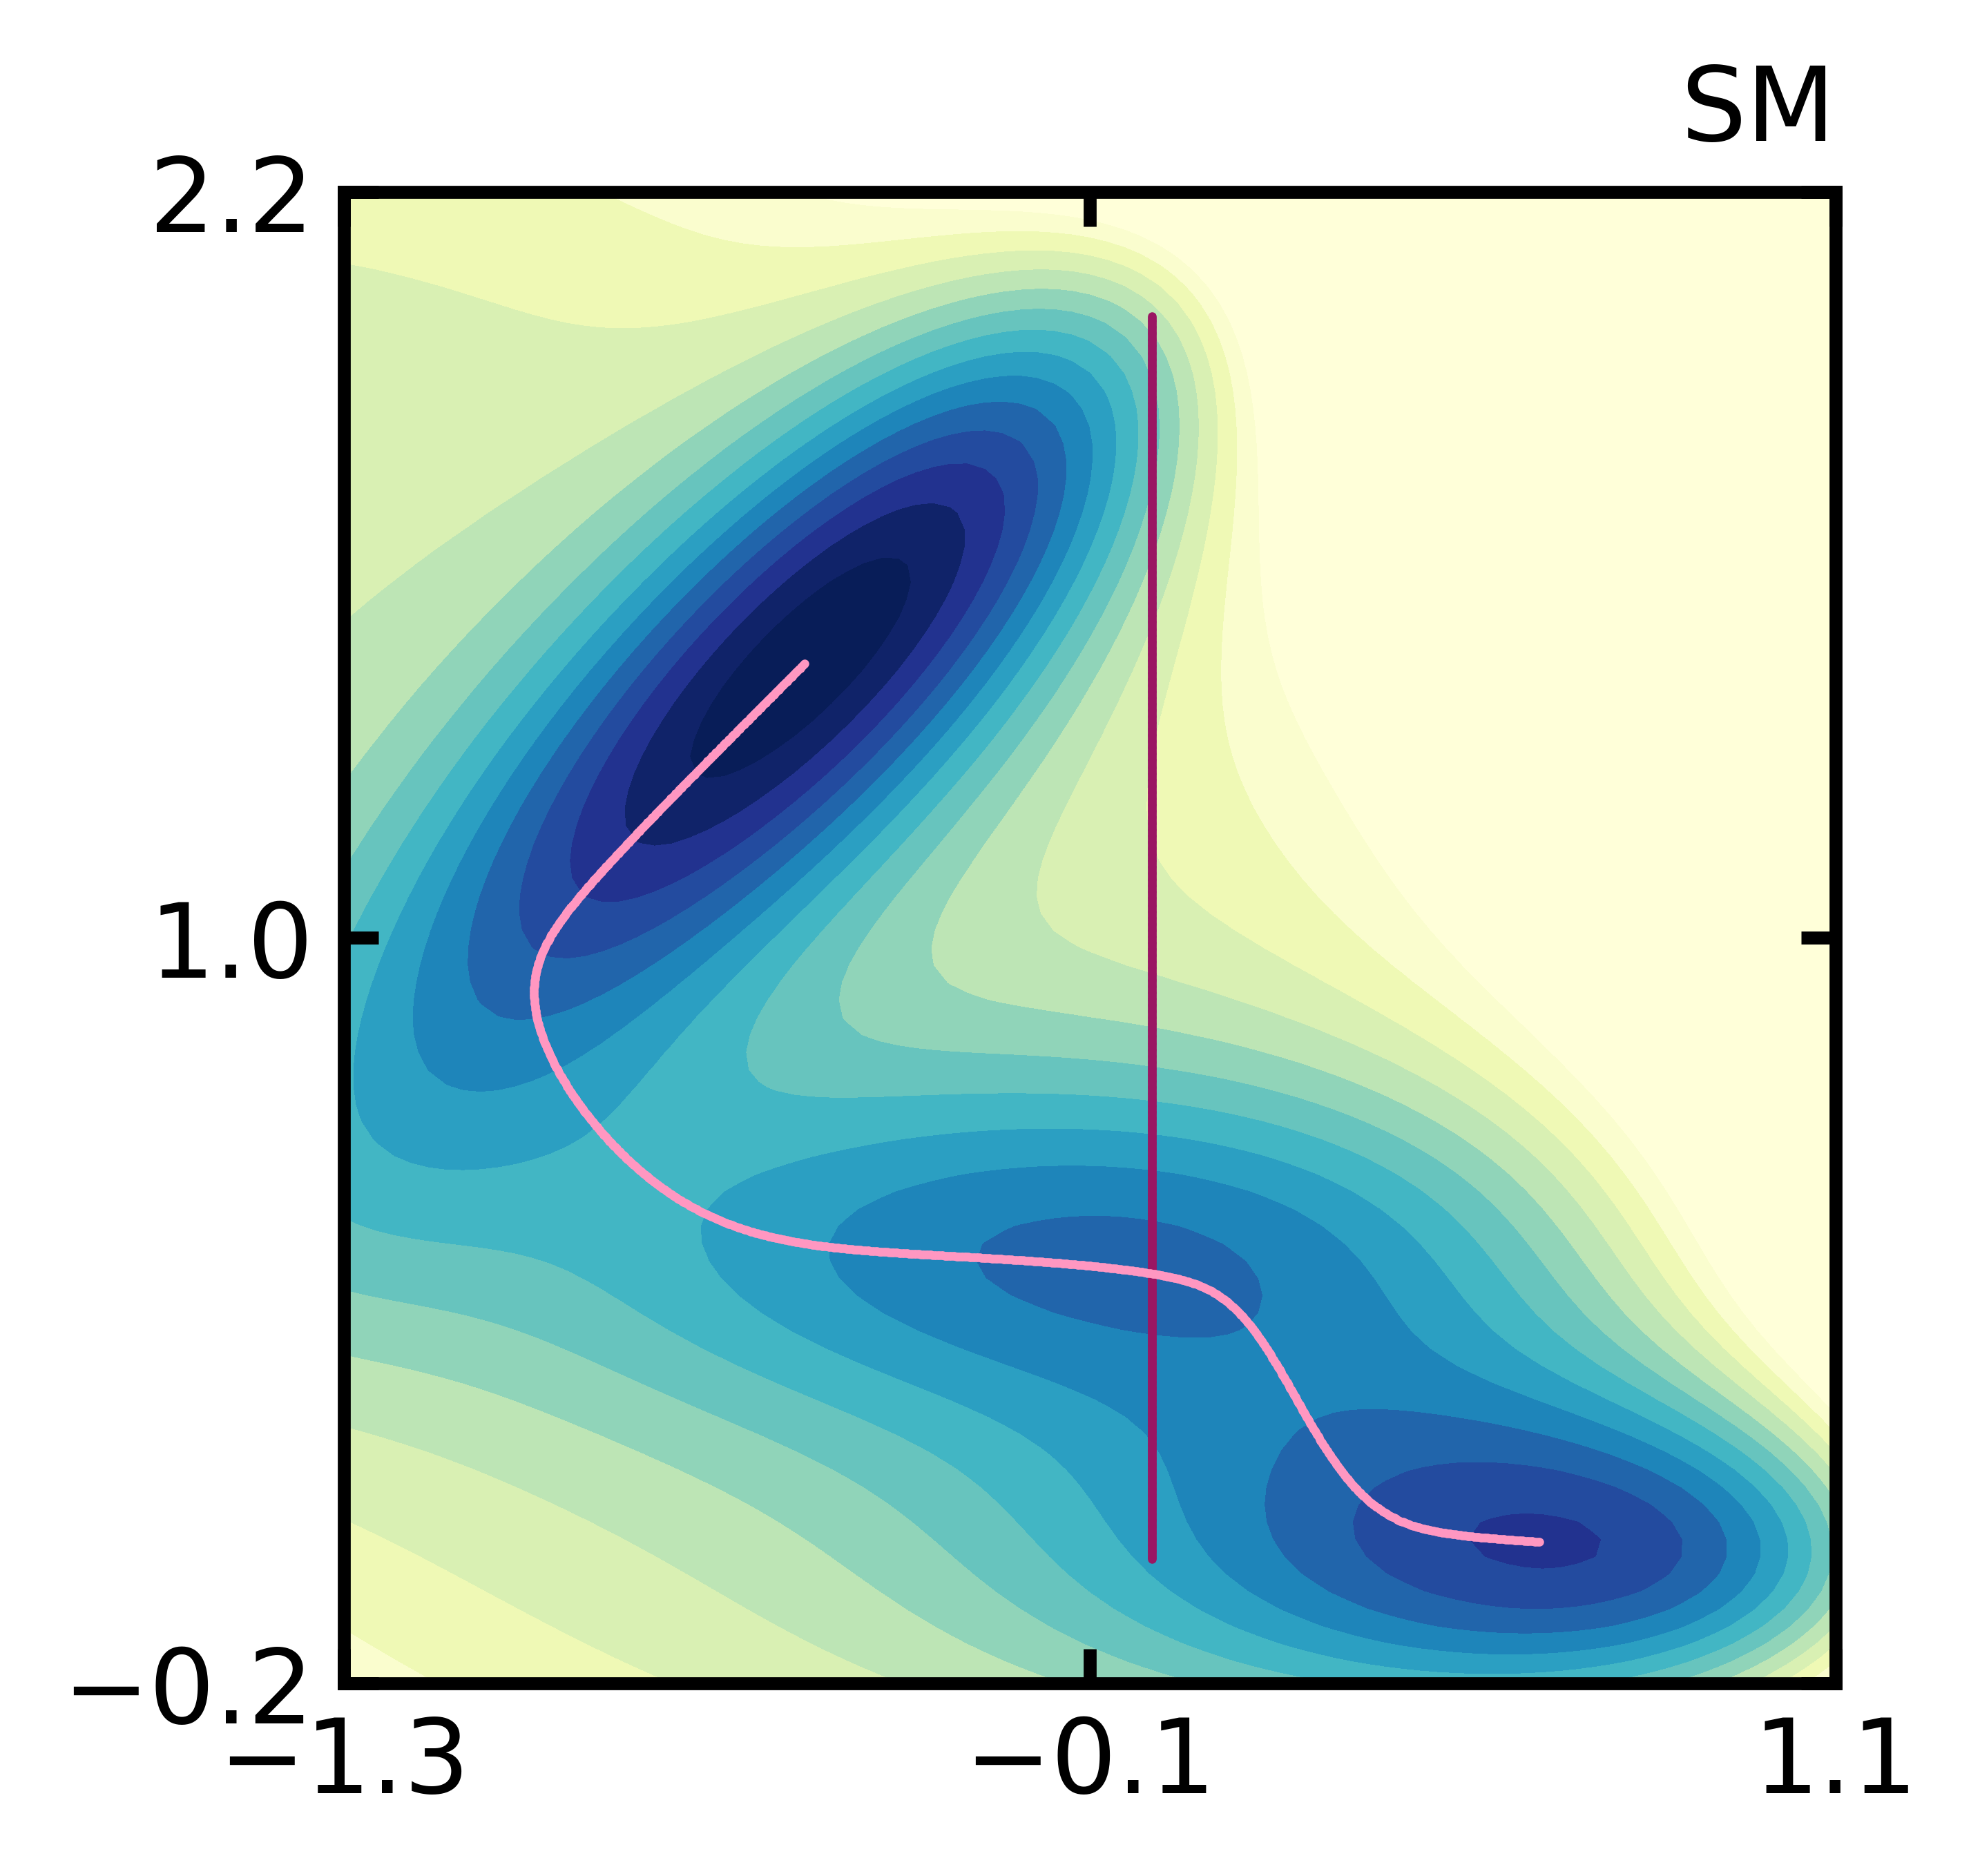

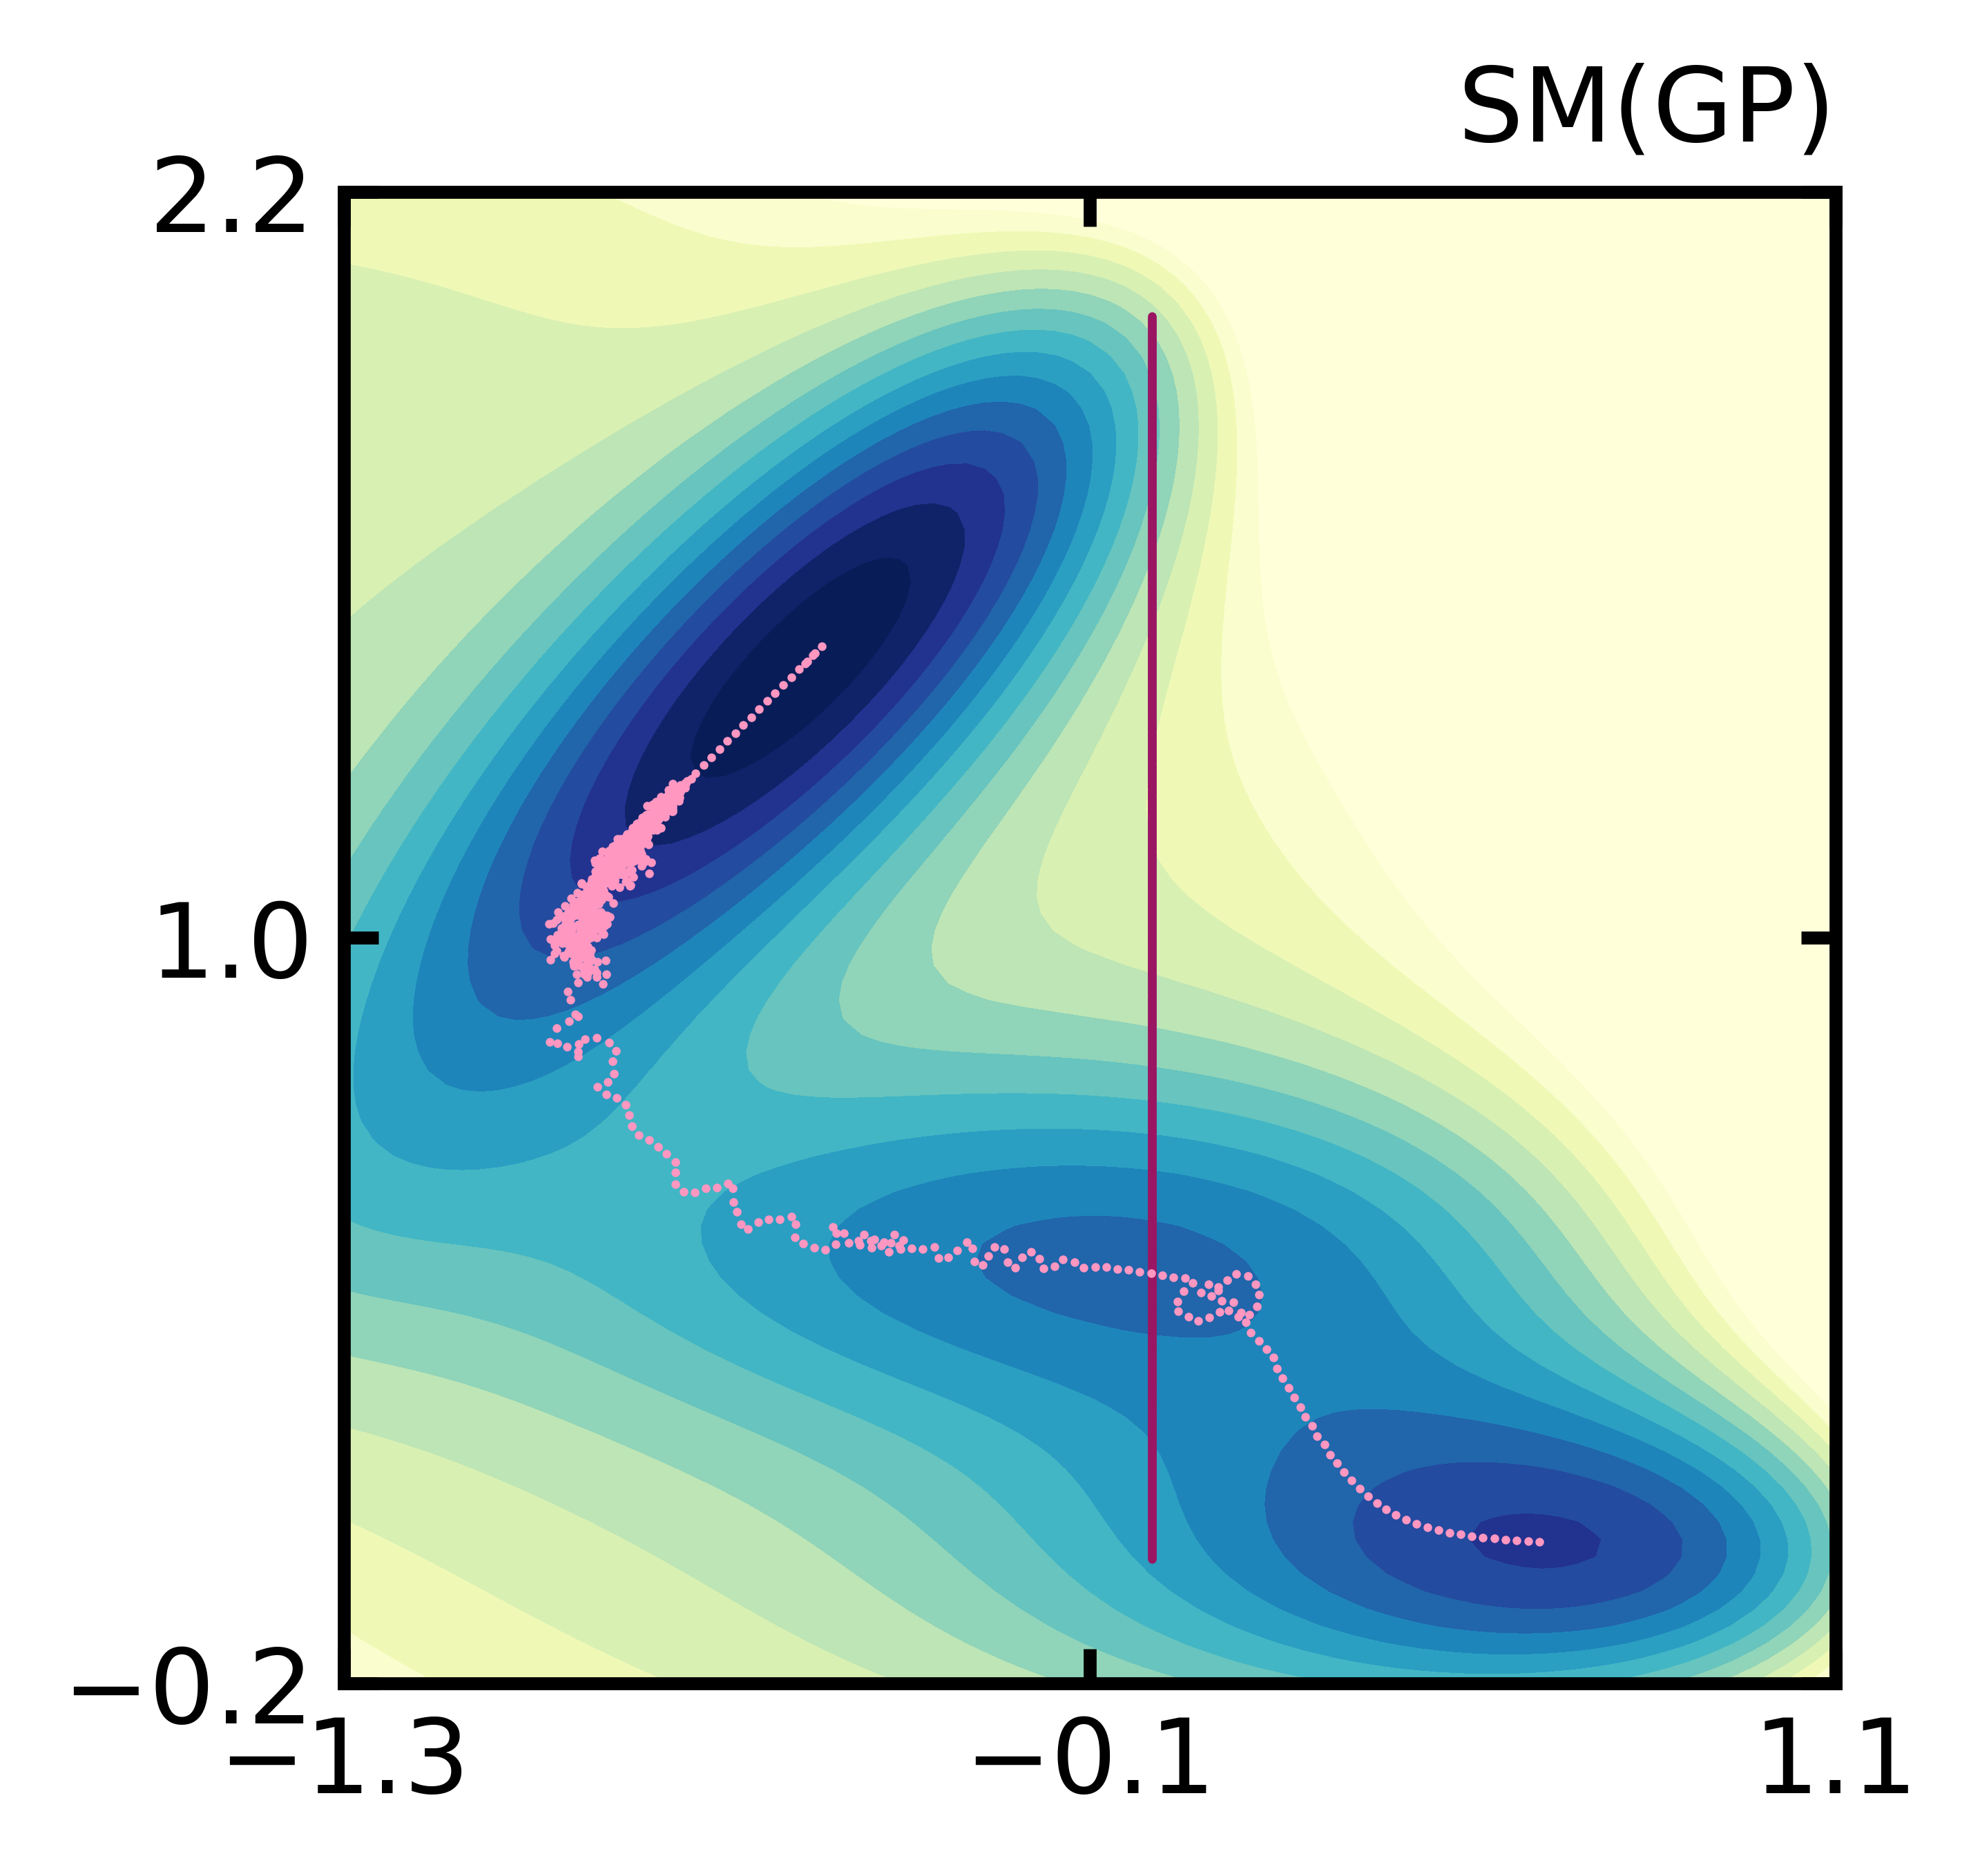

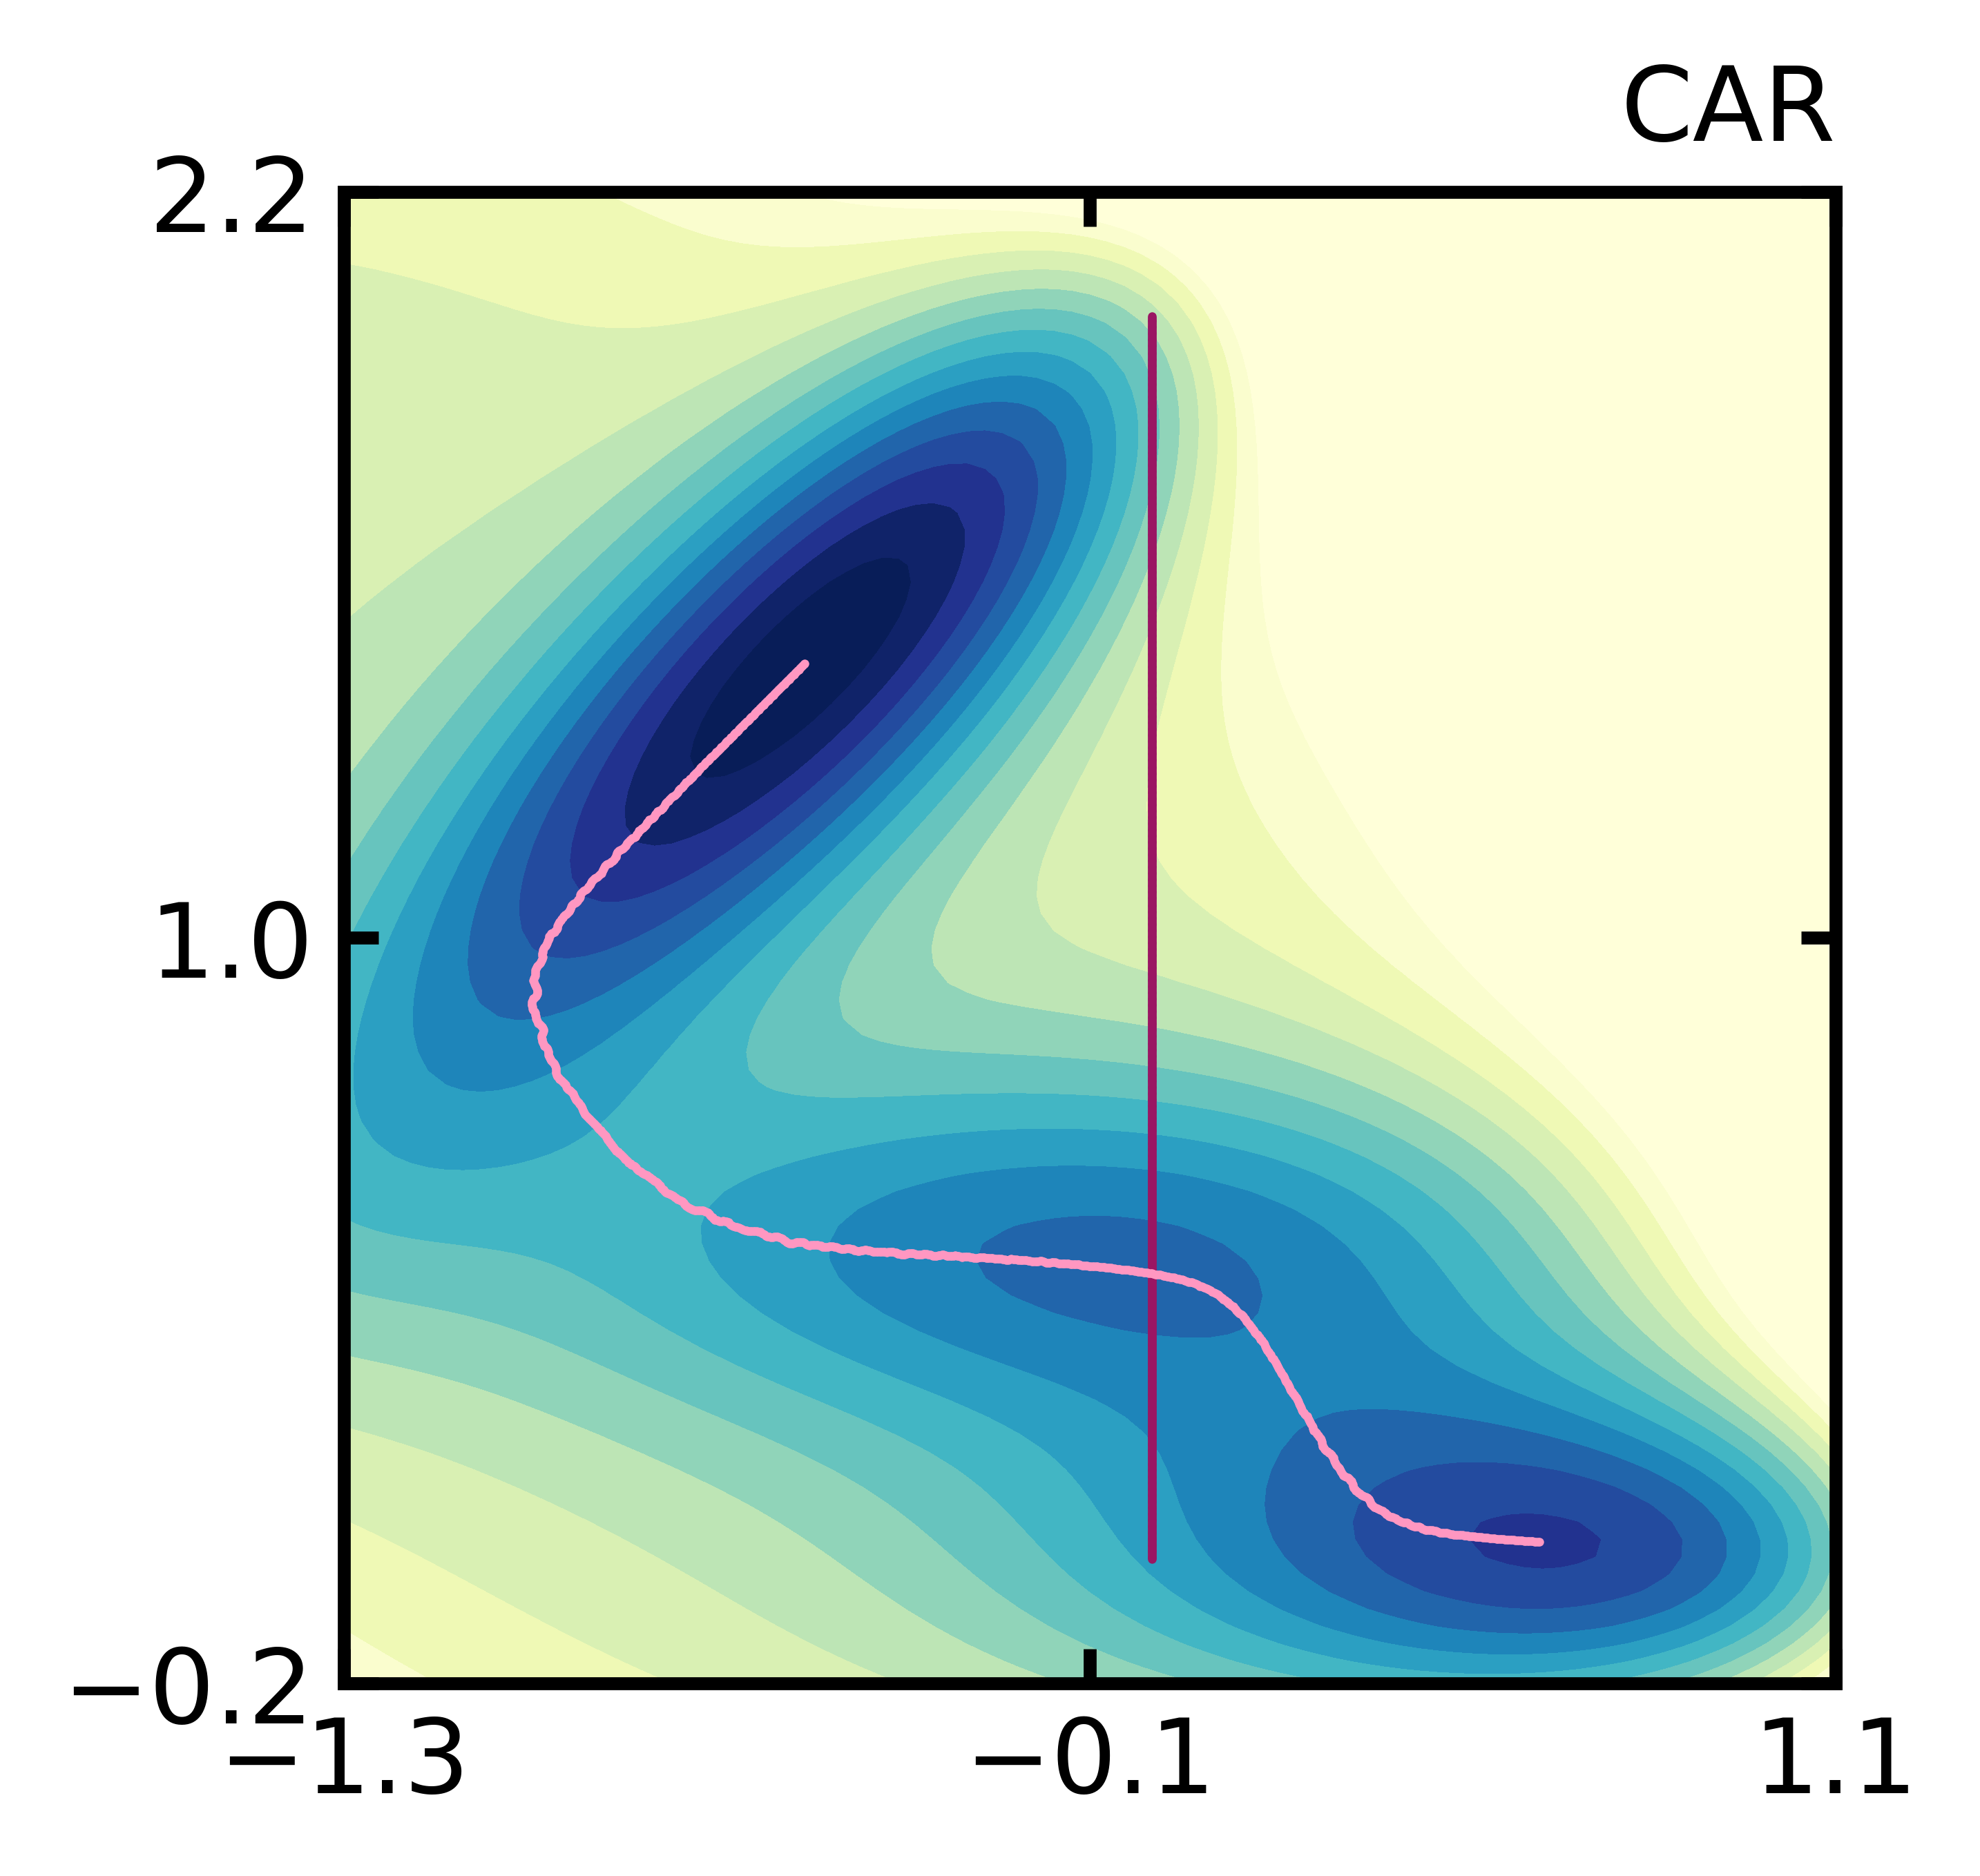

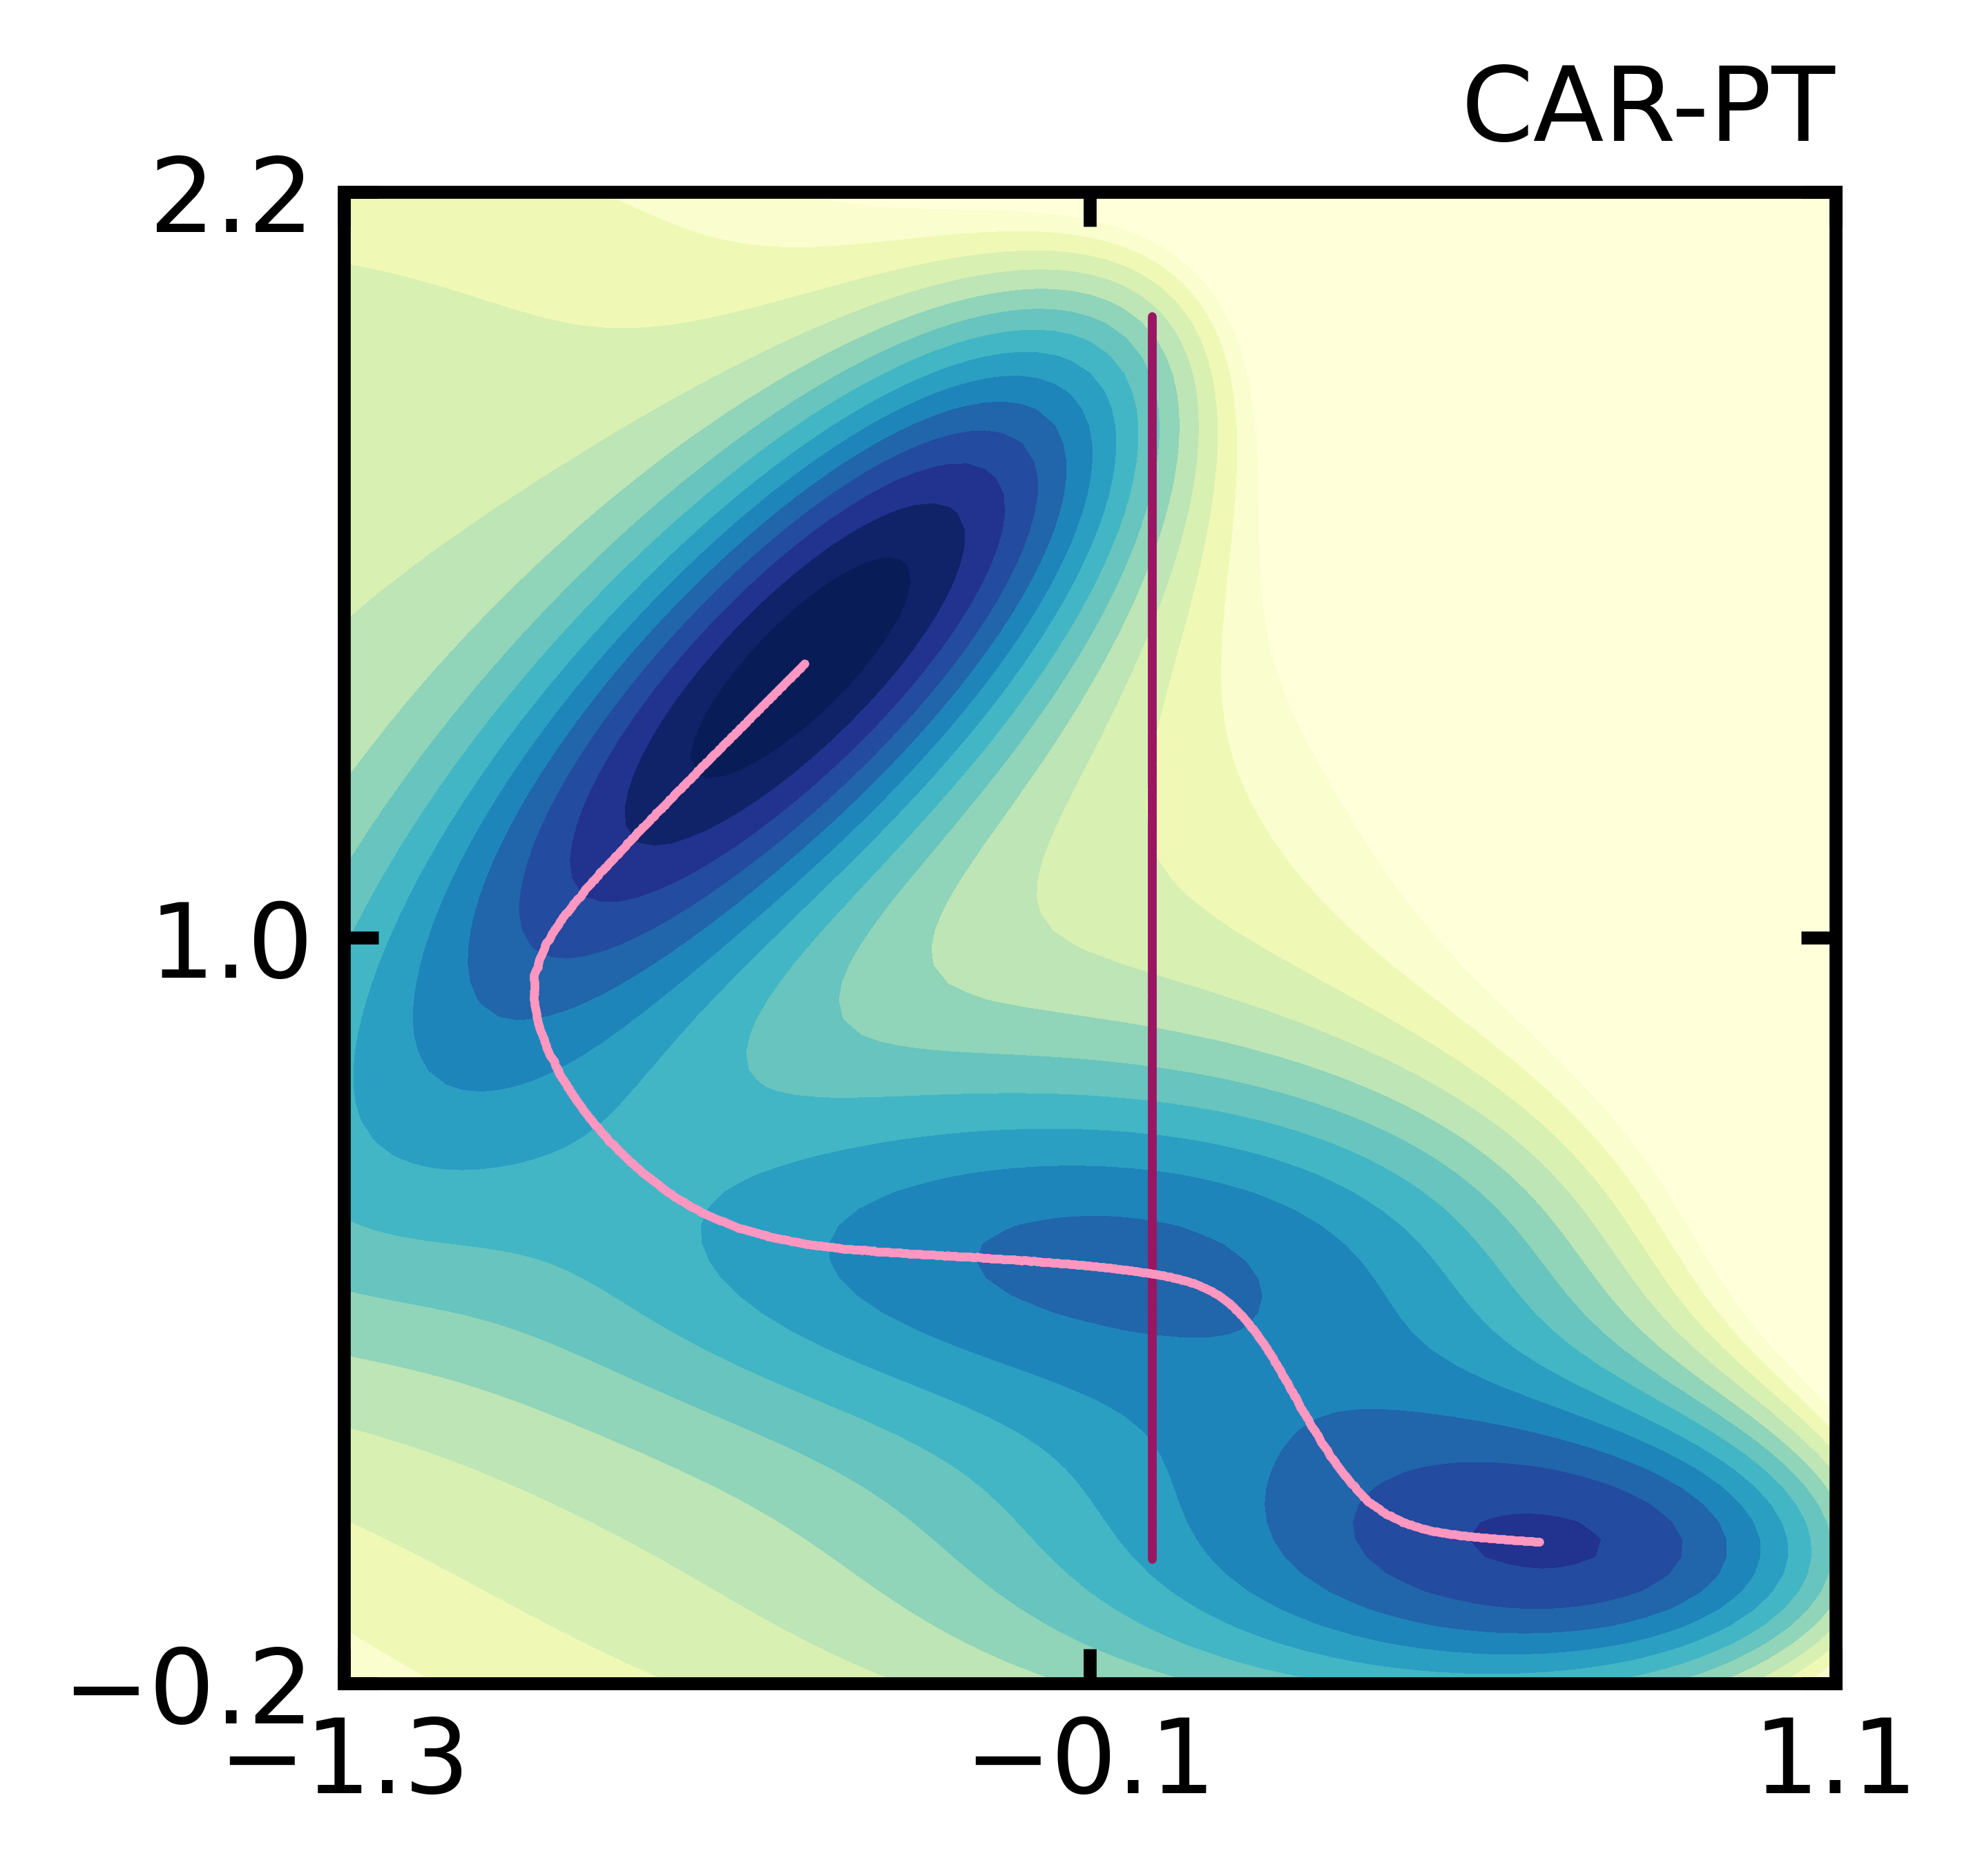

In [82]:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=900)
plt.subplots_adjust(left=1./4., right=3.4/4., top=3.4/4., bottom=1./4.)

ax, v = plot_cvec(ax, cvec_denserep_sm[0], cvec_denserep_sm[1])
ax.set_title('SM', fontdict={'fontsize':12}, loc='right')

plt.savefig('./ms0_car/fig_exploit/plot_denserep_sm.jpeg')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=900)
plt.subplots_adjust(left=1./4., right=3.4/4., top=3.4/4., bottom=1./4.)

ax, v = plot_cvec(ax, cvec_denserep_smgp[0], cvec_denserep_smgp[1])
ax.set_title('SM(GP)', fontdict={'fontsize':12}, loc='right')

plt.savefig('./ms0_car/fig_exploit/plot_denserep_smgp.jpeg')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=900)
plt.subplots_adjust(left=1./4., right=3.4/4., top=3.4/4., bottom=1./4.)

ax, v = plot_cvec(ax, cvec_denserep_car[0], cvec_denserep_car[1])
ax.set_title('CAR', fontdict={'fontsize':12}, loc='right')

plt.savefig('./ms0_car/fig_exploit/plot_denserep_car.jpeg')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=900)
plt.subplots_adjust(left=1./4., right=3.4/4., top=3.4/4., bottom=1./4.)

ax, v = plot_cvec(ax, cvec_denserep_carpt[0], cvec_denserep_carpt[1])
ax.set_title('CAR-PT', fontdict={'fontsize':12}, loc='right')

plt.savefig('./ms0_car/fig_exploit/plot_denserep_carpt.jpeg')

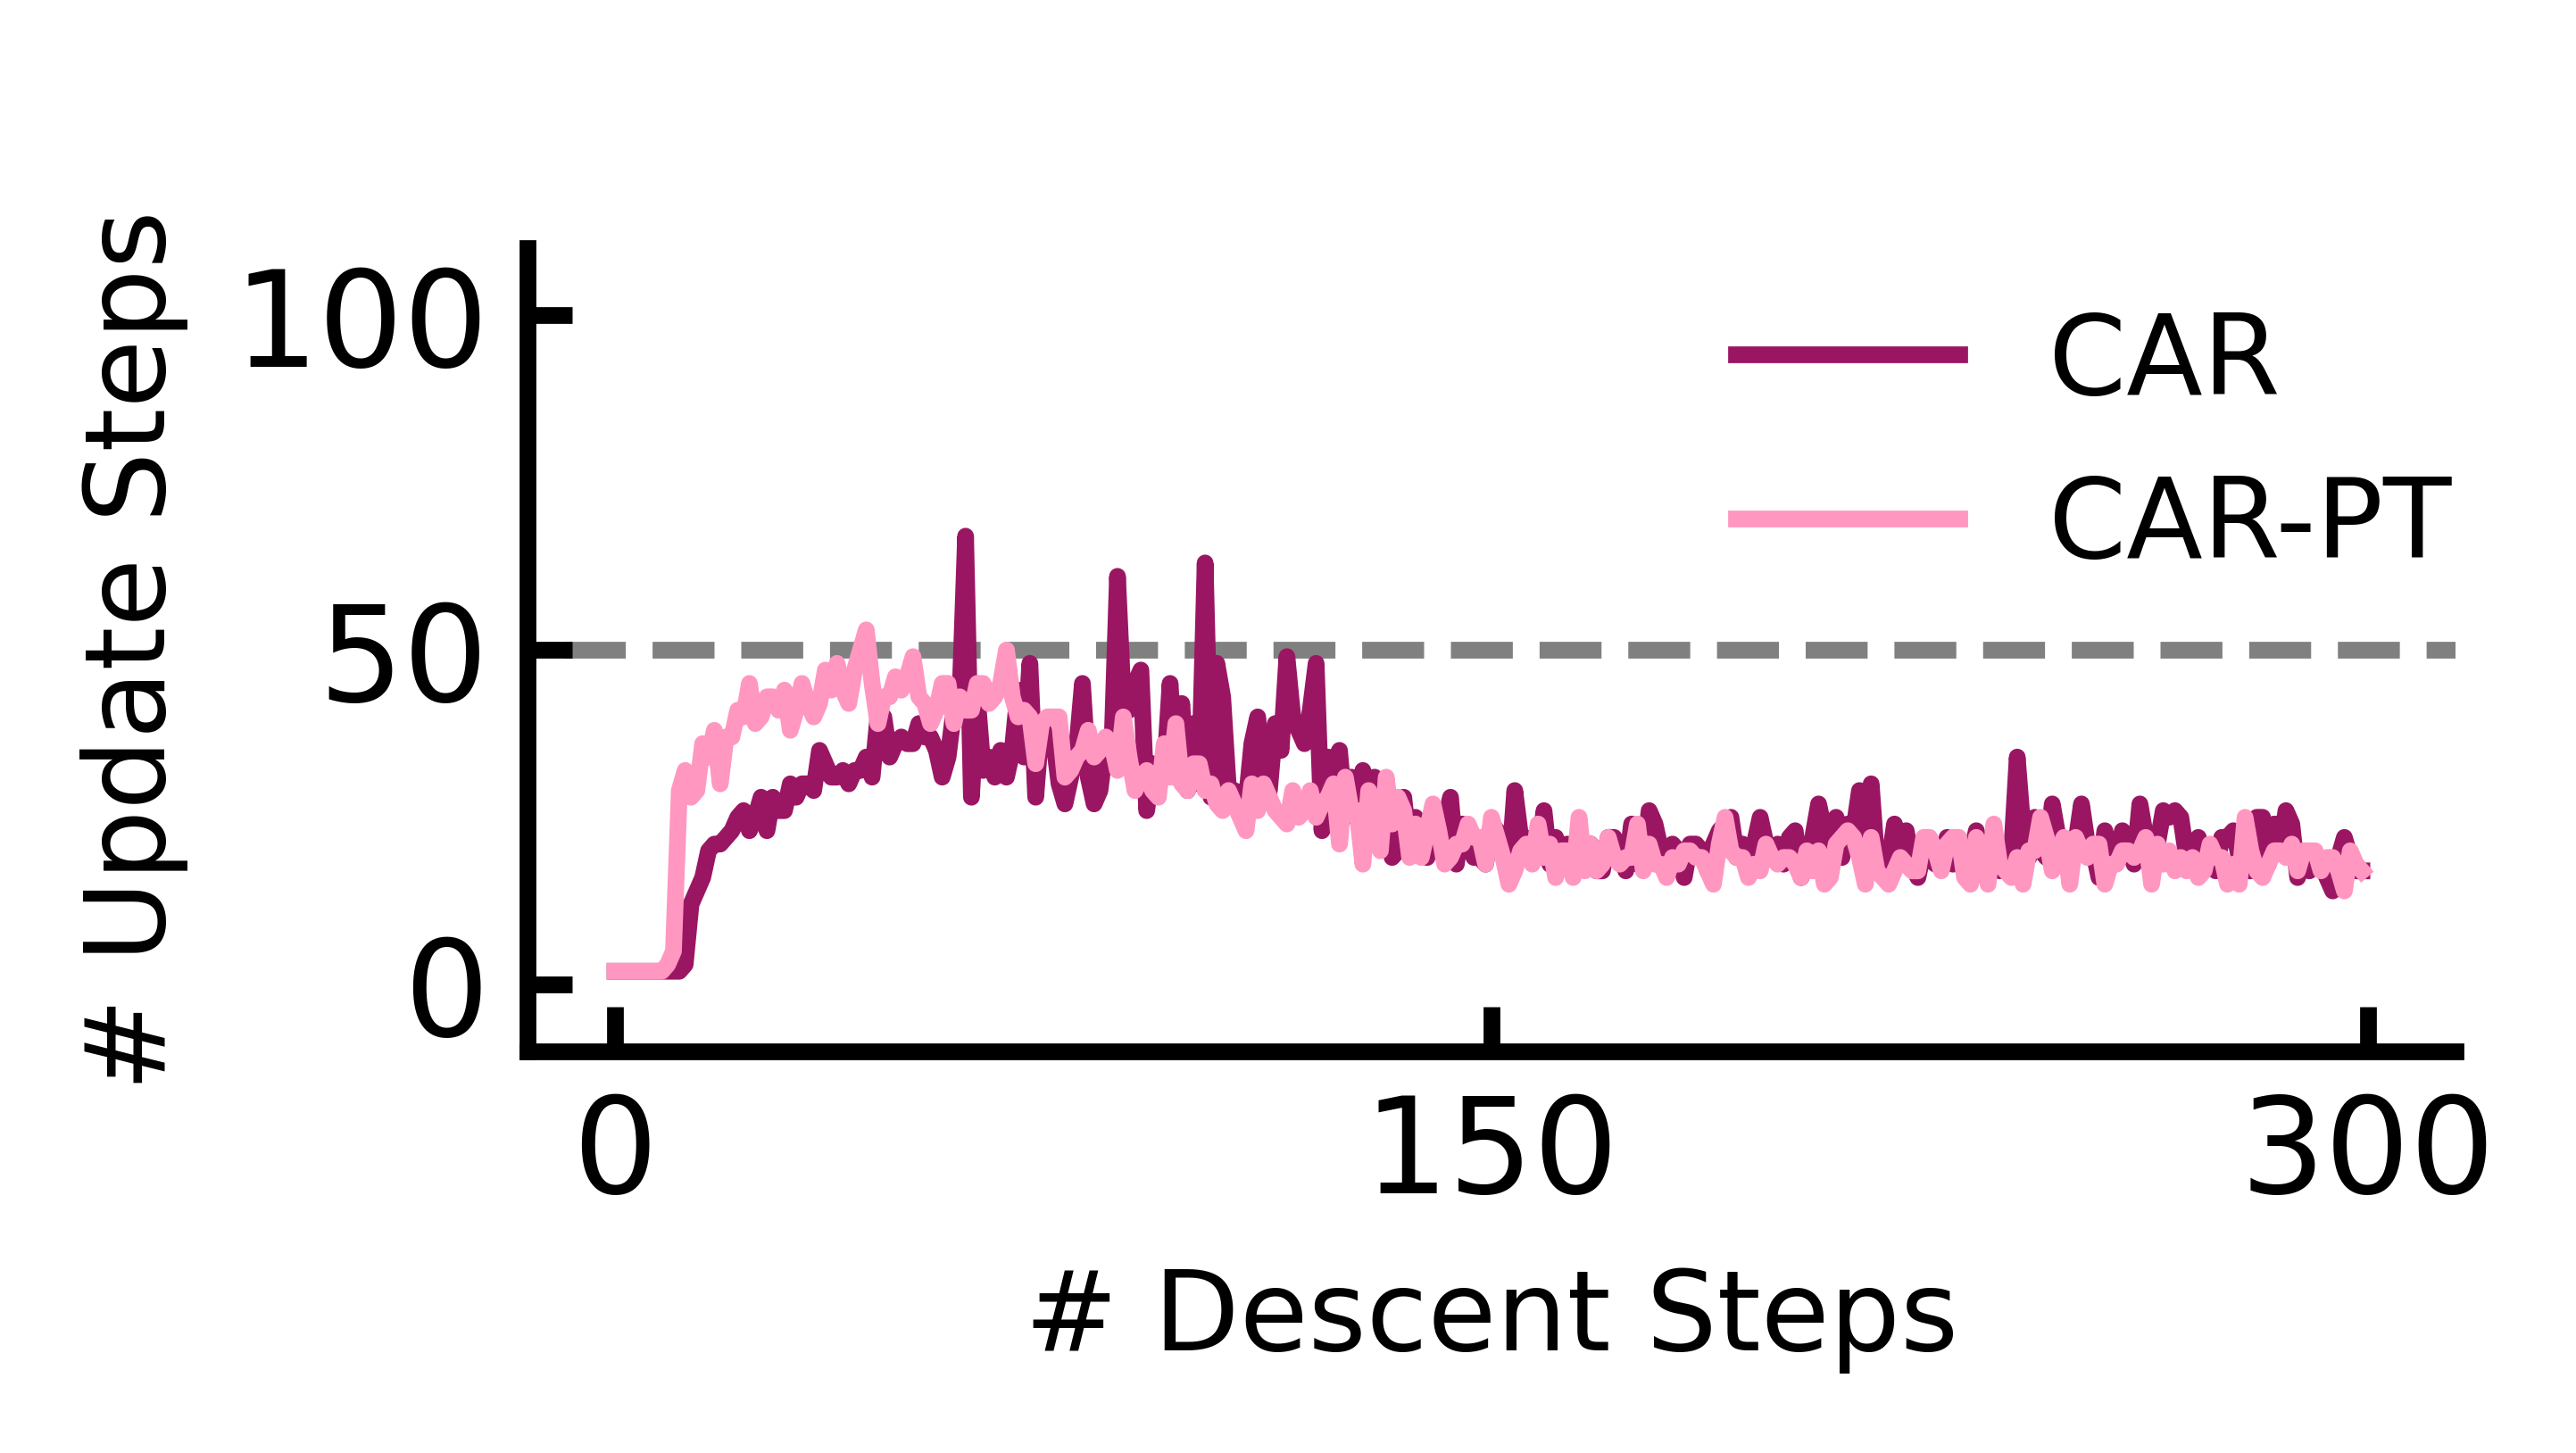

In [83]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=900)
plt.subplots_adjust(left=1./4., right=3.4/4., top=2./4., bottom=1./4.)

ax.tick_params(direction='in', width=1.5, length=4, labelsize=12)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title(" ")

    # ax.scatter(init[:, 0], init[:, 1], s=1., color="#219EBC", zorder=5)

    # # Plot trajectory of cvec.
    # for t in traj[::4]:
    #     ax.scatter(t[:, 0], t[:, 1], s=.2,  color="#434242", zorder=4)
    #     ax.plot(   t[:, 0], t[:, 1], lw=.3, color="#434242", zorder=4)
    
    # # Plot final cvec.
    # ax.scatter(finl[:, 0], finl[:, 1], s=1., color="#FF97C1", zorder=5)
# Fig. iterative update counts
ax.plot([-100, 500], [50, 50], 'gray', ls='--', lw=1.5, zorder=0)

ax.plot(numpy.arange(len(itr_denserep_car  )), itr_denserep_car  , color="#9A1663",  label='CAR')
ax.plot(numpy.arange(len(itr_denserep_carpt)), itr_denserep_carpt, color="#FF97C1",  label='CAR-PT')

ax.set(xlim=(-15, 315), ylim=(-10, 110), xticks=[0, 150, 300], yticks=[0, 50, 100])
ax.set_ylabel('# Update Steps')
ax.set_xlabel('# Descent Steps')

leg = plt.legend(loc="upper right", bbox_to_anchor=(1.05, 1.05), frameon=False)

plt.savefig('./ms0_car/fig_exploit/plot_denserep_itr.jpeg')


# itr_denserep_car,   rms_denserep_car   = load_traj('dense_rep', 'car')
# itr_denserep_carpt, rms_denserep_carpt = load_traj('dense_rep', 'carpt')

# itr_hcons_car,   rms_hcons_car   = load_traj('high_cons_thresh', 'car')
# itr_hcons_carpt, rms_hcons_carpt = load_traj('high_cons_thresh', 'carpt')

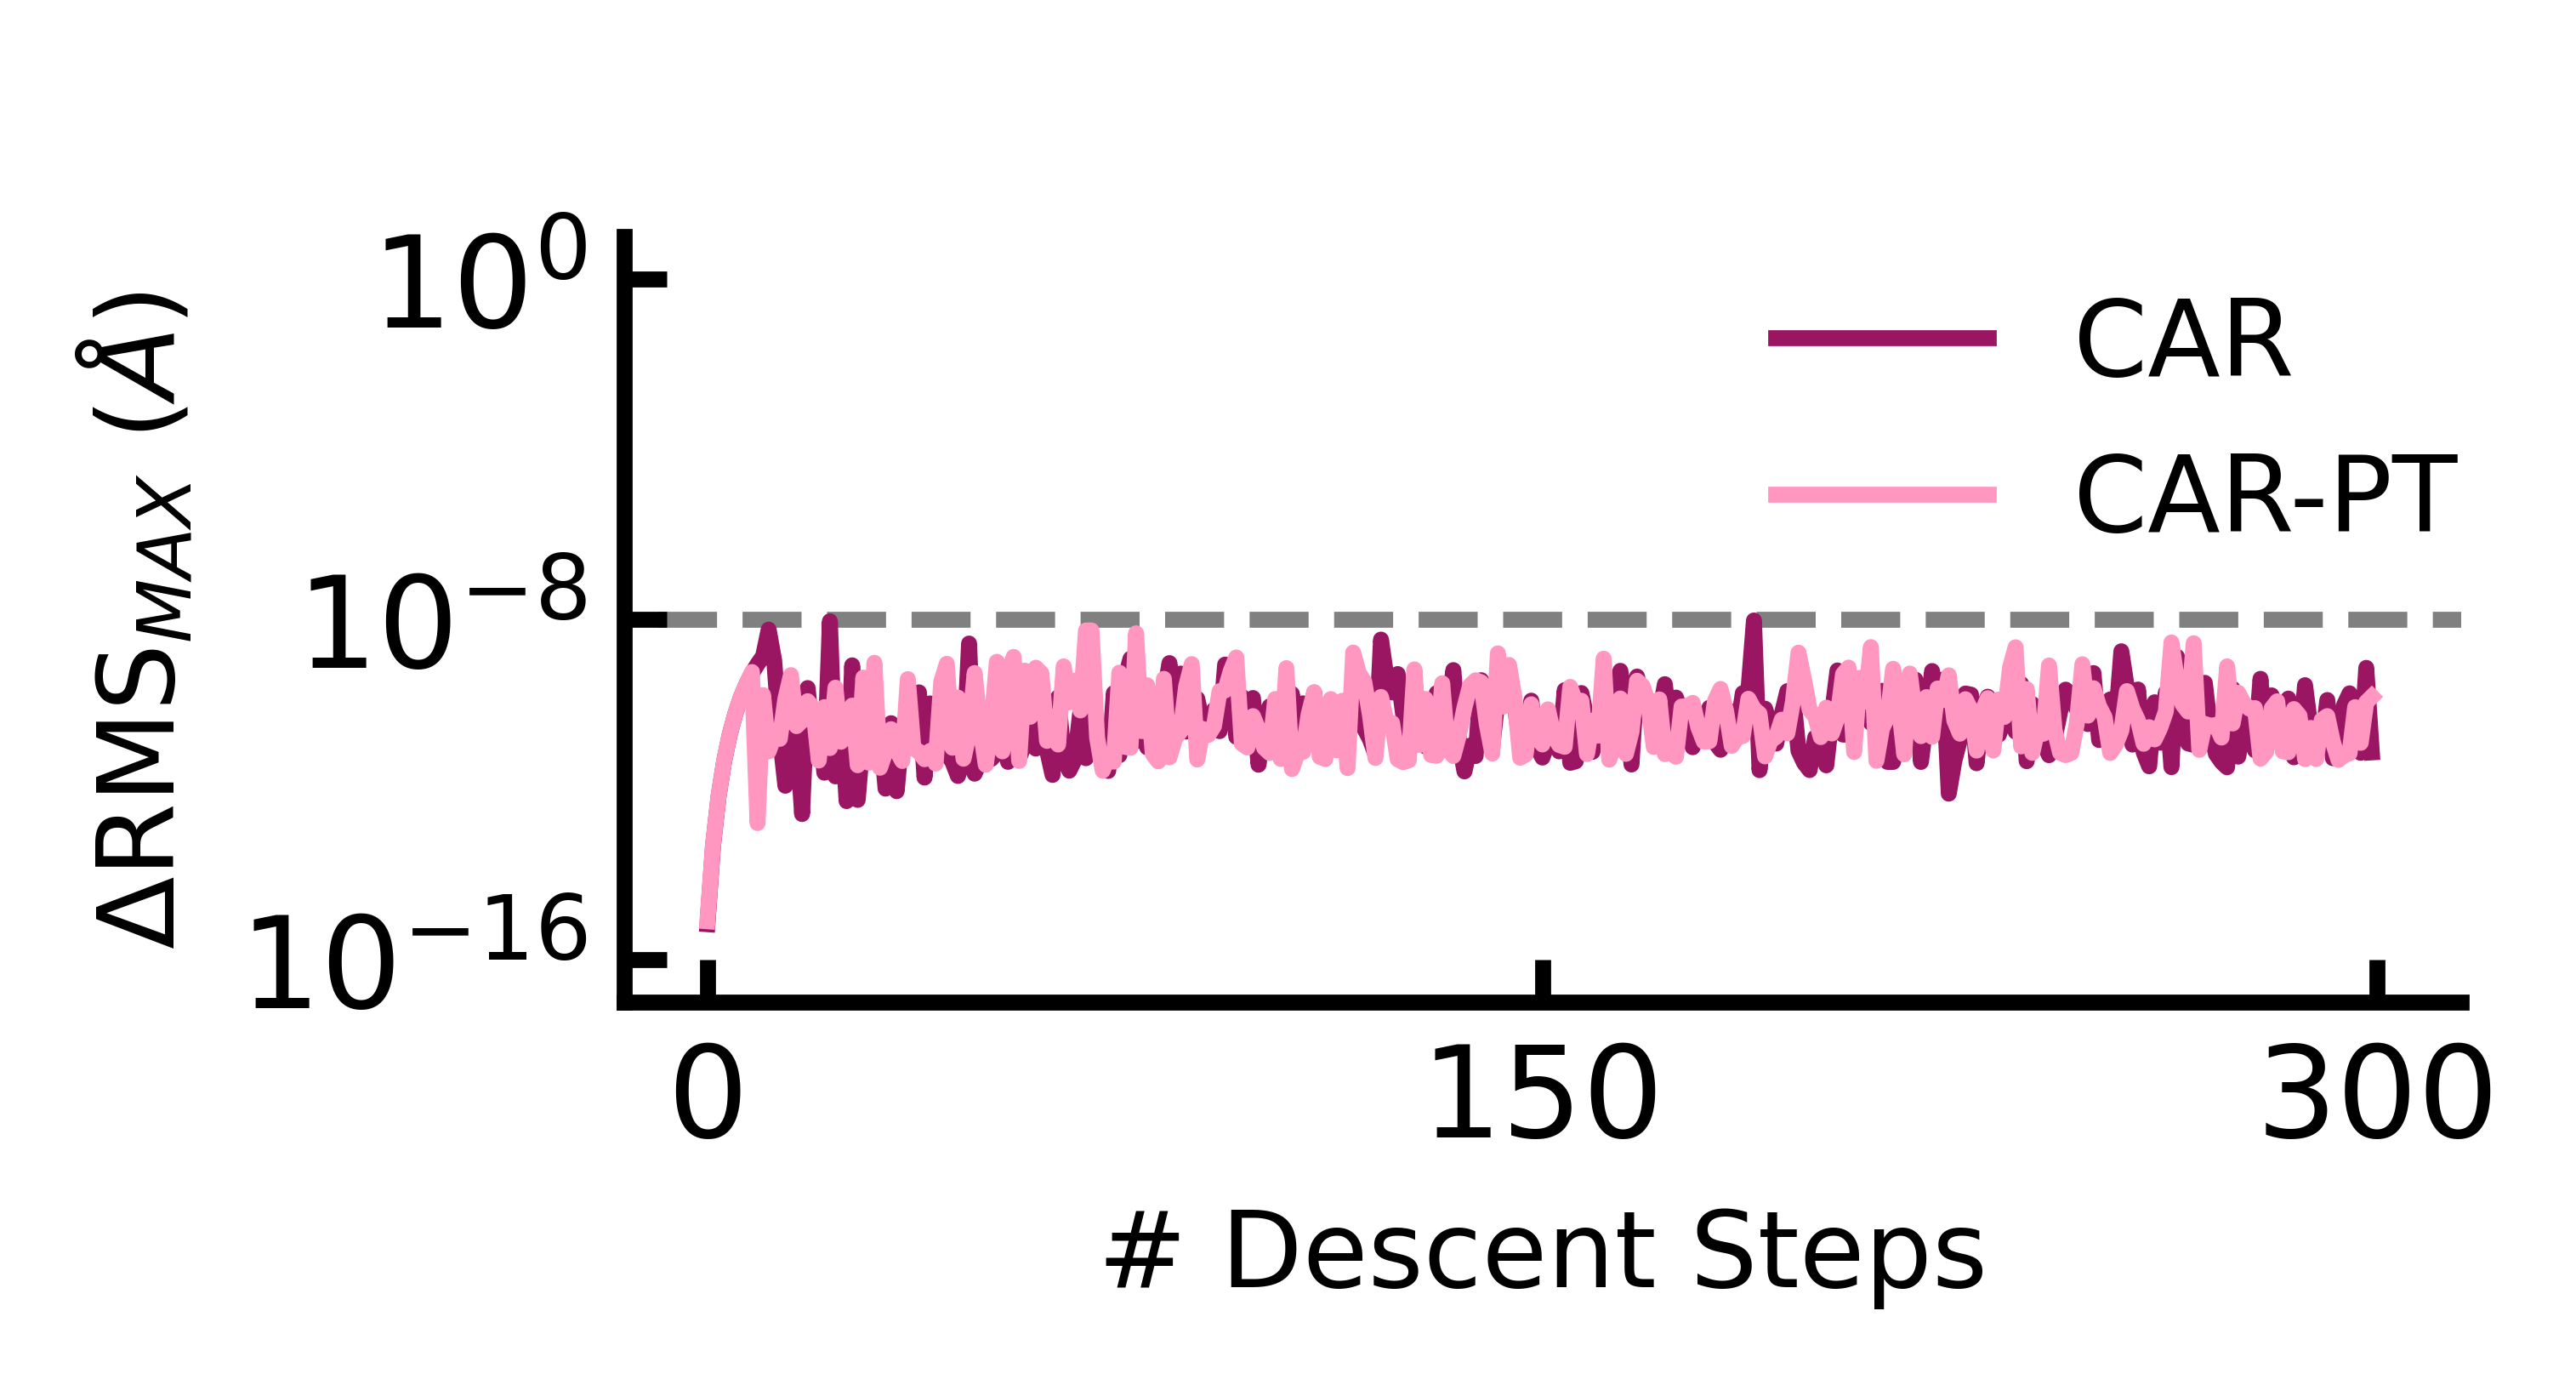

In [84]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=900)
plt.subplots_adjust(left=1./4., right=3.4/4., top=2./4., bottom=1./4.)

ax.tick_params(direction='in', width=1.5, length=4, labelsize=12)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title(" ")

    # ax.scatter(init[:, 0], init[:, 1], s=1., color="#219EBC", zorder=5)

    # # Plot trajectory of cvec.
    # for t in traj[::4]:
    #     ax.scatter(t[:, 0], t[:, 1], s=.2,  color="#434242", zorder=4)
    #     ax.plot(   t[:, 0], t[:, 1], lw=.3, color="#434242", zorder=4)
    
    # # Plot final cvec.
    # ax.scatter(finl[:, 0], finl[:, 1], s=1., color="#FF97C1", zorder=5)
# Fig. iterative update counts
ax.plot([-100, 500], [1e-8, 1e-8], 'gray', ls='--', lw=1.5, zorder=0)

ax.plot(numpy.arange(len(rms_denserep_car  )), rms_denserep_car  , color="#9A1663",  label='CAR')
ax.plot(numpy.arange(len(rms_denserep_carpt)), rms_denserep_carpt, color="#FF97C1",  label='CAR-PT')

ax.set(xlim=(-15, 315), xticks=[0, 150, 300],
       ylim=(1e-17, 10.), yscale='log', yticks=[1e-16, 1e-8, 1])
ax.set_ylabel(r'$\mathrm{\Delta RMS}_{MAX}}$ ($\AA$)') 
ax.set_xlabel('# Descent Steps')

leg = plt.legend(loc="upper right", bbox_to_anchor=(1.05, 1.05), frameon=False)

plt.savefig('./ms0_car/fig_exploit/plot_denserep_rms.jpeg')


# itr_denserep_car,   rms_denserep_car   = load_traj('dense_rep', 'car')
# itr_denserep_carpt, rms_denserep_carpt = load_traj('dense_rep', 'carpt')

# itr_hcons_car,   rms_hcons_car   = load_traj('high_cons_thresh', 'car')
# itr_hcons_carpt, rms_hcons_carpt = load_traj('high_cons_thresh', 'carpt')

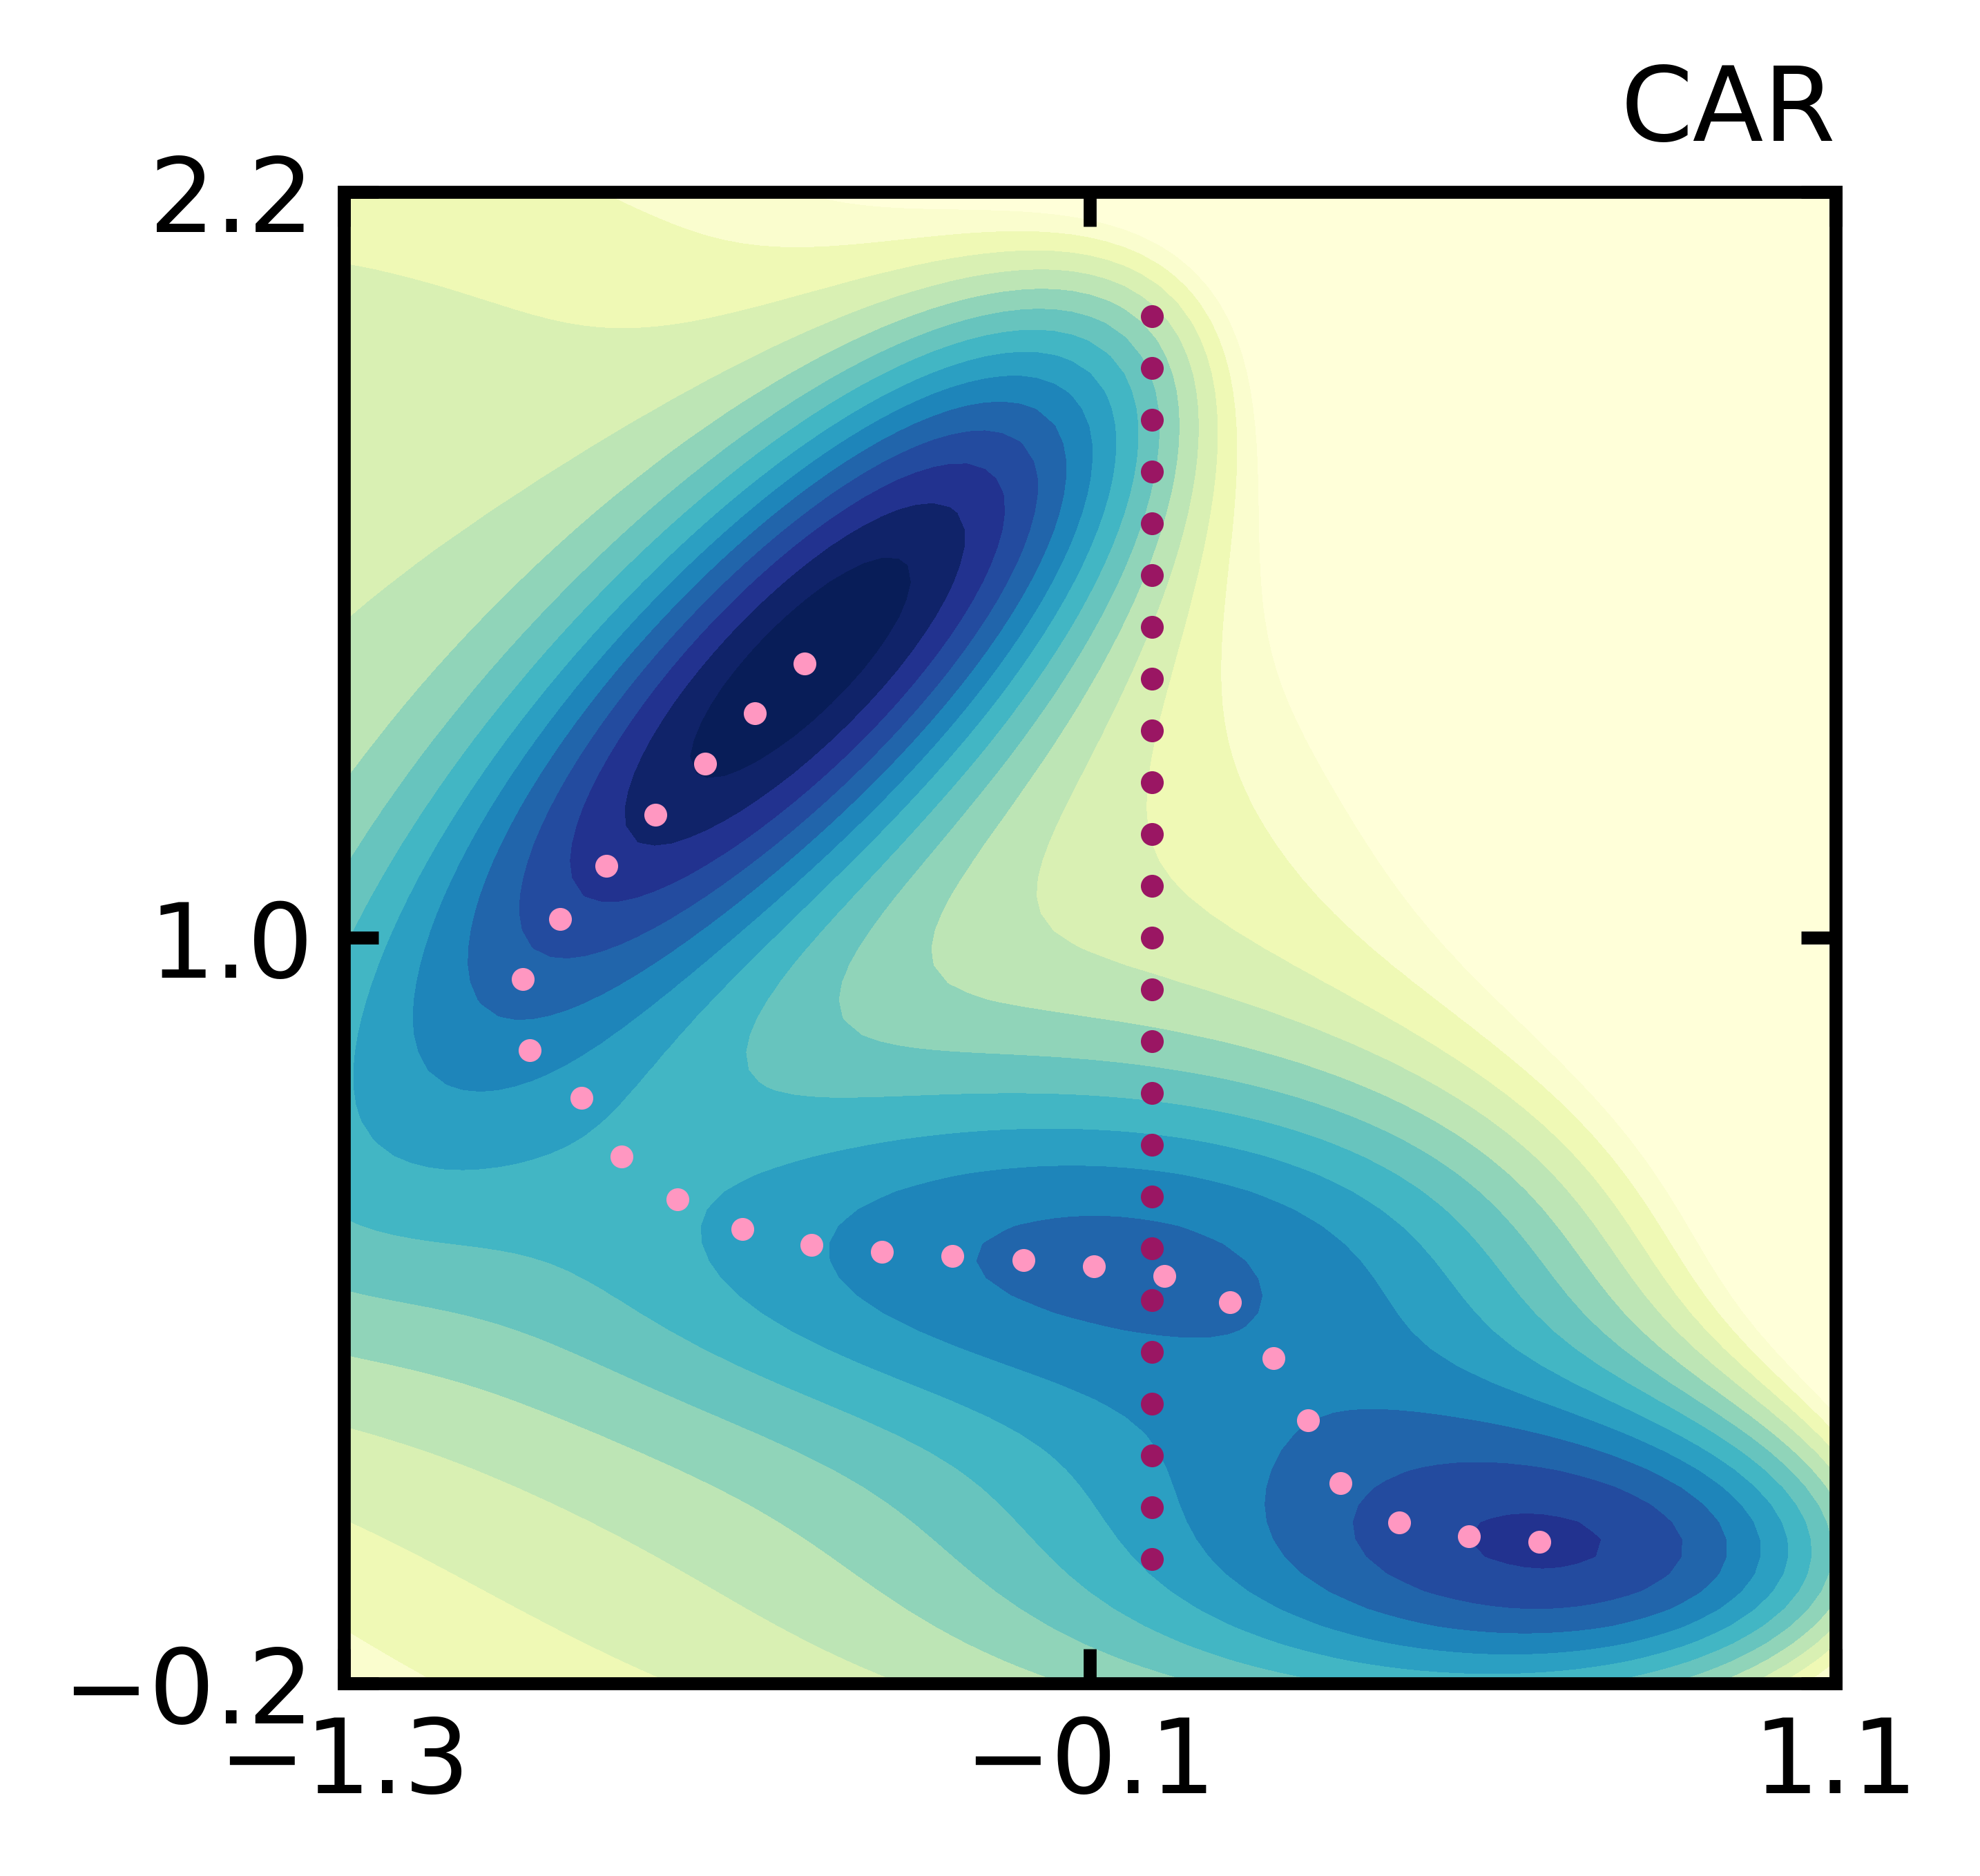

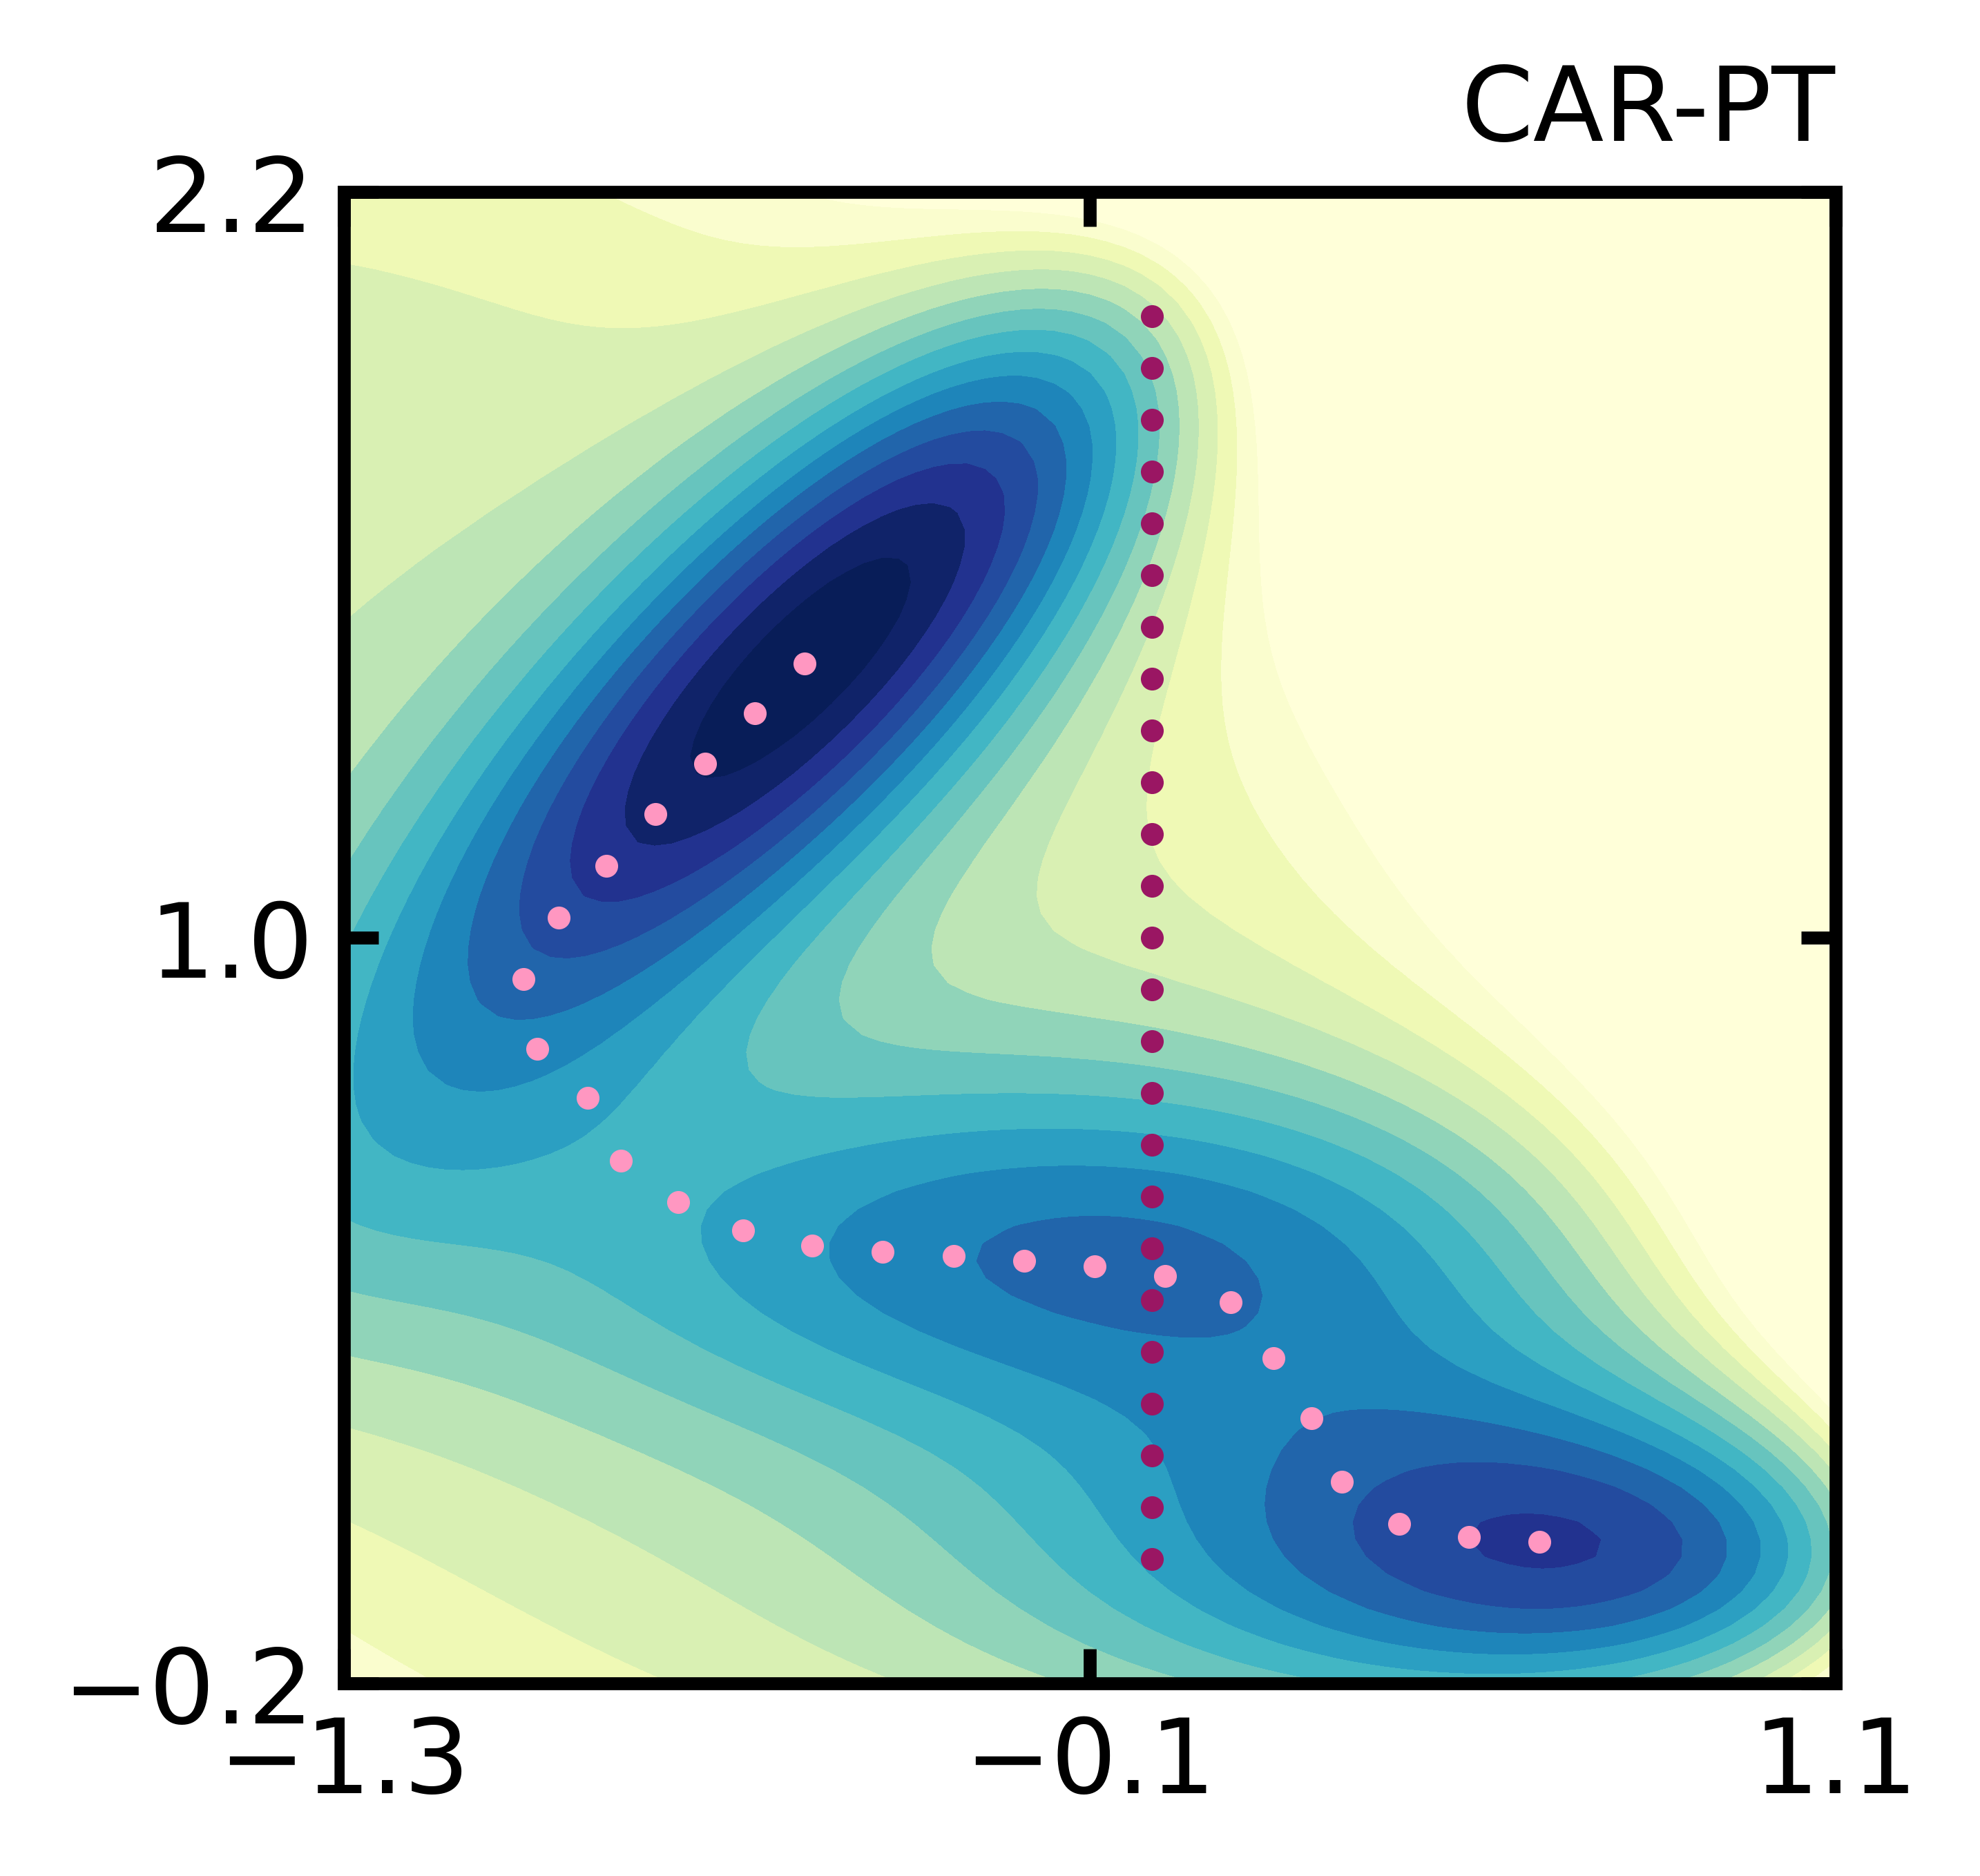

In [85]:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=900)
plt.subplots_adjust(left=1./4., right=3.4/4., top=3.4/4., bottom=1./4.)

ax, v = plot_cvec(ax, cvec_hcons_car[0], cvec_hcons_car[1], s=7)
ax.set_title('CAR', fontdict={'fontsize':12}, loc='right')

plt.savefig('./ms0_car/fig_exploit/plot_hcons_car.jpeg')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=900)
plt.subplots_adjust(left=1./4., right=3.4/4., top=3.4/4., bottom=1./4.)

ax, v = plot_cvec(ax, cvec_hcons_carpt[0], cvec_hcons_carpt[1], s=7)
ax.set_title('CAR-PT', fontdict={'fontsize':12}, loc='right')

plt.savefig('./ms0_car/fig_exploit/plot_hcons_carpt.jpeg')

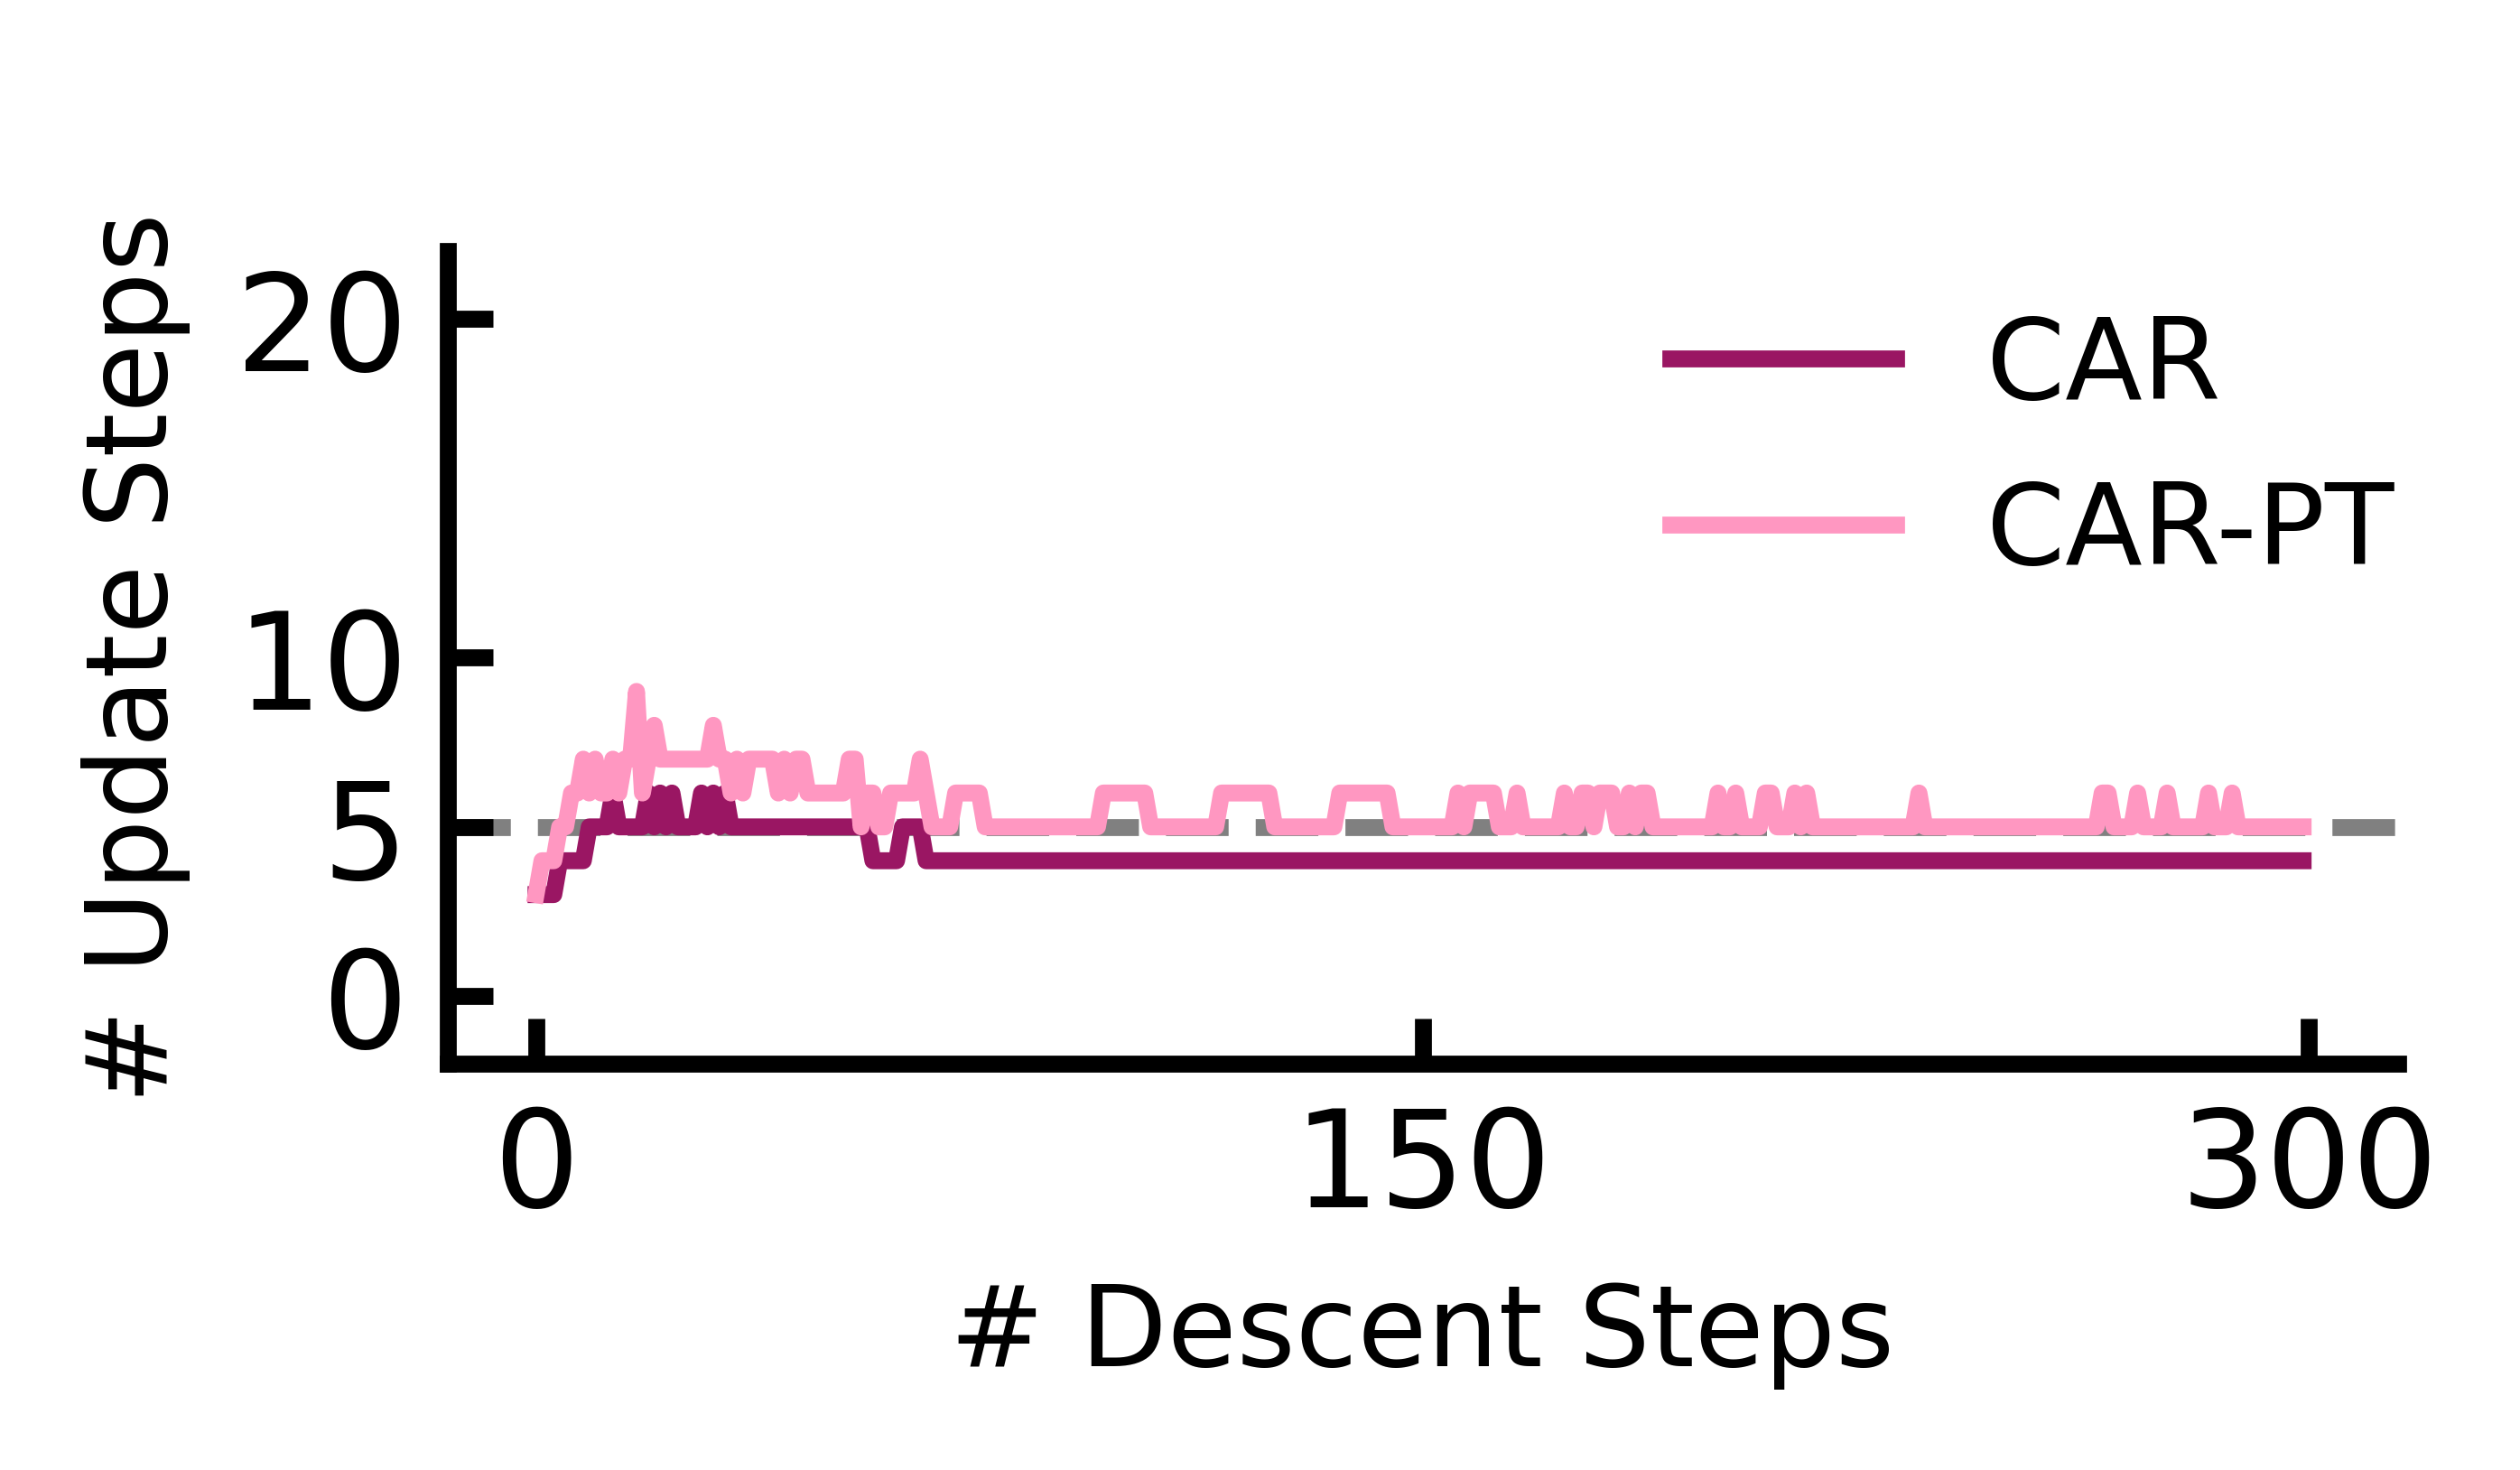

In [86]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=900)
plt.subplots_adjust(left=1./4., right=3.4/4., top=2./4., bottom=1./4.)

ax.tick_params(direction='in', width=1.5, length=4, labelsize=12)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title(" ")

    # ax.scatter(init[:, 0], init[:, 1], s=1., color="#219EBC", zorder=5)

    # # Plot trajectory of cvec.
    # for t in traj[::4]:
    #     ax.scatter(t[:, 0], t[:, 1], s=.2,  color="#434242", zorder=4)
    #     ax.plot(   t[:, 0], t[:, 1], lw=.3, color="#434242", zorder=4)
    
    # # Plot final cvec.
    # ax.scatter(finl[:, 0], finl[:, 1], s=1., color="#FF97C1", zorder=5)
# Fig. iterative update counts
ax.plot([-100, 500], [5, 5], 'gray',  ls='--', lw=1.5, zorder=0)

ax.plot(numpy.arange(len(itr_hcons_car  )), itr_hcons_car  , color="#9A1663",  label='CAR')
ax.plot(numpy.arange(len(itr_hcons_carpt)), itr_hcons_carpt, color="#FF97C1",  label='CAR-PT')

ax.set(xlim=(-15, 315), ylim=(-2, 22),xticks=[0, 150, 300], yticks=[0, 5, 10, 20])
ax.set_ylabel('# Update Steps')
ax.set_xlabel('# Descent Steps')

leg = plt.legend(loc="upper right", bbox_to_anchor=(1.05, 1.05), frameon=False)

plt.savefig('./ms0_car/fig_exploit/plot_hcons_itr.jpeg')


# itr_denserep_car,   rms_denserep_car   = load_traj('dense_rep', 'car')
# itr_denserep_carpt, rms_denserep_carpt = load_traj('dense_rep', 'carpt')

# itr_hcons_car,   rms_hcons_car   = load_traj('high_cons_thresh', 'car')
# itr_hcons_carpt, rms_hcons_carpt = load_traj('high_cons_thresh', 'carpt')

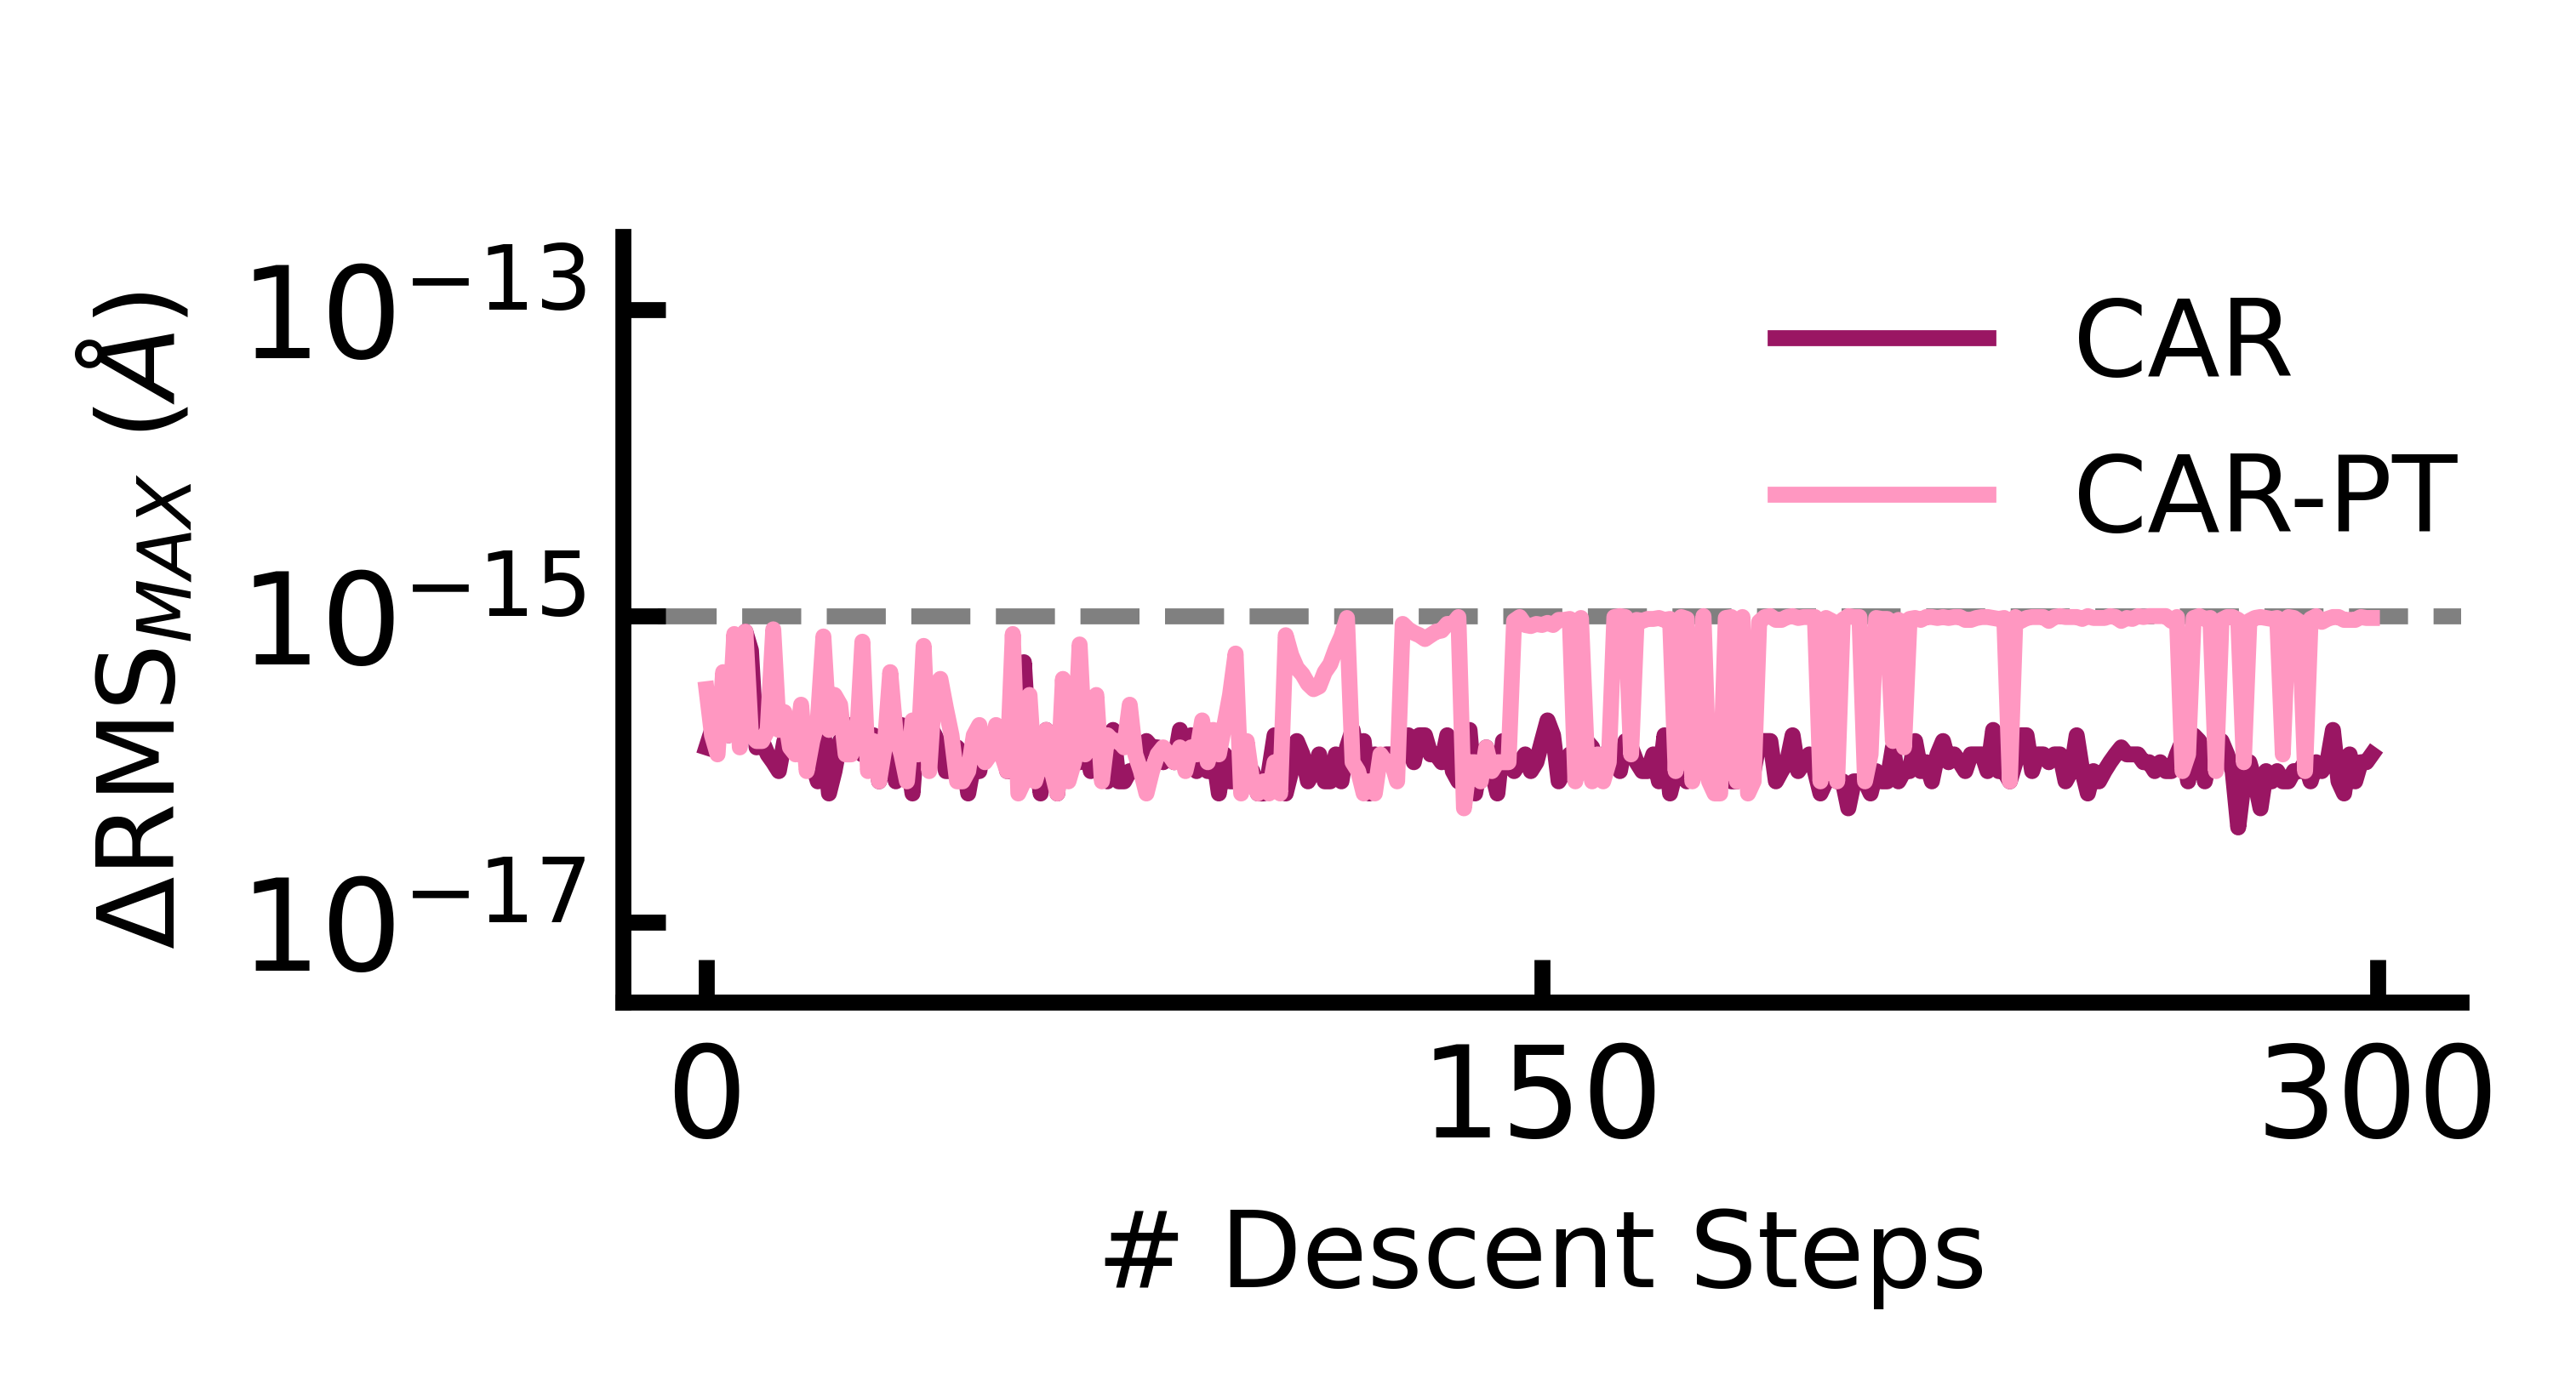

In [87]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=900)
plt.subplots_adjust(left=1./4., right=3.4/4., top=2./4., bottom=1./4.)

ax.tick_params(direction='in', width=1.5, length=4, labelsize=12)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title(" ")

    # ax.scatter(init[:, 0], init[:, 1], s=1., color="#219EBC", zorder=5)

    # # Plot trajectory of cvec.
    # for t in traj[::4]:
    #     ax.scatter(t[:, 0], t[:, 1], s=.2,  color="#434242", zorder=4)
    #     ax.plot(   t[:, 0], t[:, 1], lw=.3, color="#434242", zorder=4)
    
    # # Plot final cvec.
    # ax.scatter(finl[:, 0], finl[:, 1], s=1., color="#FF97C1", zorder=5)
# Fig. iterative update counts
ax.plot([-100, 500], [1e-15, 1e-15], 'gray', ls='--', lw=1.5, zorder=0)

ax.plot(numpy.arange(len(rms_hcons_car  )), rms_hcons_car  , color="#9A1663",  label='CAR')
ax.plot(numpy.arange(len(rms_hcons_carpt)), rms_hcons_carpt, color="#FF97C1",  label='CAR-PT')

ax.set(xlim=(-15, 315), xticks=[0, 150, 300],
       ylim=(3*1e-18, 3*1e-13), yscale='log', yticks=[1e-17, 1e-15, 1e-13])
ax.set_ylabel(r'$\mathrm{\Delta RMS}_{MAX}}$ ($\AA$)') 
ax.set_xlabel('# Descent Steps')

leg = plt.legend(loc="upper right", bbox_to_anchor=(1.05, 1.05), frameon=False)

plt.savefig('./ms0_car/fig_exploit/plot_hcons_rms.jpeg')


# itr_denserep_car,   rms_denserep_car   = load_traj('dense_rep', 'car')
# itr_denserep_carpt, rms_denserep_carpt = load_traj('dense_rep', 'carpt')

# itr_hcons_car,   rms_hcons_car   = load_traj('high_cons_thresh', 'car')
# itr_hcons_carpt, rms_hcons_carpt = load_traj('high_cons_thresh', 'carpt')